# Project 2 - Ames Housing Data and Housing Price Predictions

## 1. Problem:
Create a housing price model that will predict housing sale prices based on the features in the Ames Housing Dataset.

The data description can be found at : http://jse.amstat.org/v19n3/decock/DataDocumentation.txt.

## 2. Executive Summary

The data was imported via pandas, and checked for null values. A basic OLS regression was performed on scaled, intact, continuous numeric columns. Statistics for the OLS coefficients were generated, and the most promising coefficients were selected. From there, a basic model was generated from only the intact numeric columns. 

At this point, a polynomial expansion of the numeric features was generated and tested via a LASSO optimization. The LASSO model generated lower variance in the predictions, and the non-zero coefficients were noted and used on the next iteration of the model.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import missingno as msno
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.set_option('max_columns', 100, "max_rows", 100)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

## 3. Exploratory Data Analysis

Here we will take a look at the data, and build a basic model from features that don't require much manipulation. 

First, let's get a good representation of the columns with NaNs.

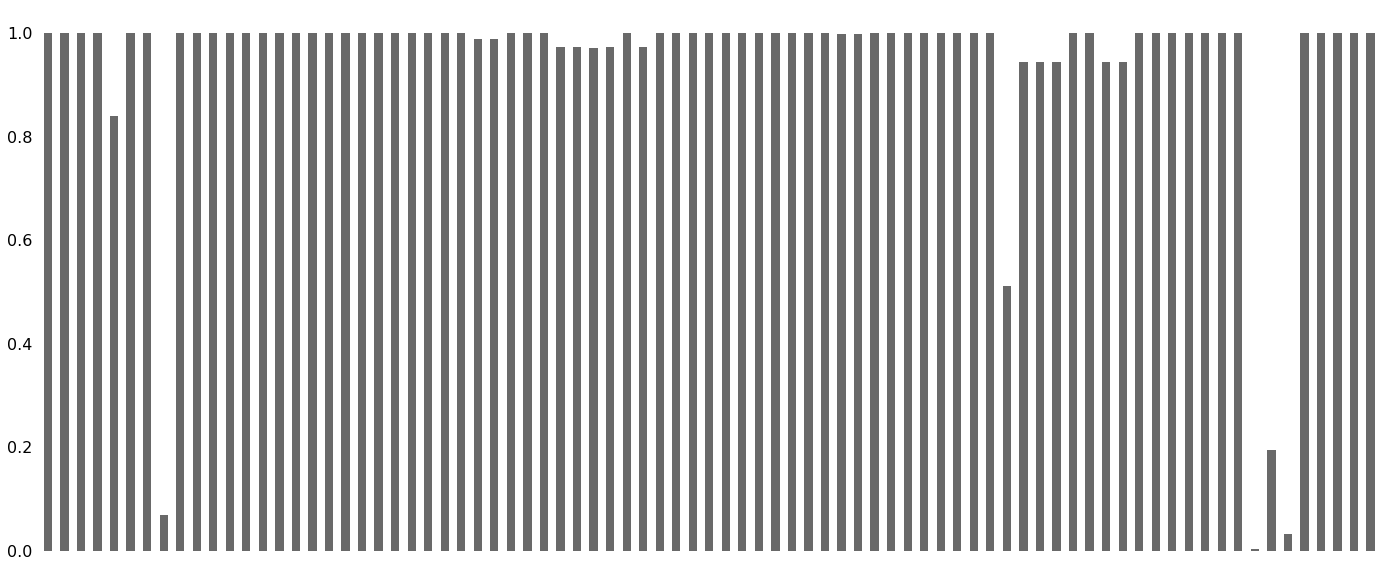

In [4]:
msno.bar(df)

In [5]:
# looks like we are missing a lot of data
# lets get a look at what that missing data is:

df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [6]:
df.columns[df.isnull().sum() > 0]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [7]:
# lets describe the numeric data:
df.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [8]:
# it's to be expected that there are going to be some low outliers, 
# and we are missing the column "Sale Condition" that would help us
# account for some of these. So lets just drop the 3 lowest priced homes
# in the dataset

low_drop = list(df.nsmallest(3, 'SalePrice').index)
df.drop(index=low_drop, inplace=True)
df.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2048.000000  2.048000e+03  2048.000000   1718.000000    2048.000000   
mean   1474.990234  7.133097e+08    57.053223     69.054715   10064.269043   
std     843.952256  1.886876e+08    42.839444     23.278427    6746.509455   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     754.750000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.500000  5.354532e+08    50.000000     68.000000    9417.500000   
75%    2199.250000  9.071801e+08    70.000000     80.000000   11512.750000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2048.000000   2048.000000  2048.000000     2048.000000   2026.000000   
mean       6.117676      5.564453  1971.767578     1984.229492     99.843534   
std        1.419152      1.102356    30.155948       21.023681    175.050567   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.750000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2047.000000   2047.000000  2047.000000    2047.000000  2048.000000   
mean     442.706888     48.029311   568.119199    1058.855398  1165.078125   
std      461.333264    165.111598   445.032606     448.989843   396.432443   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.500000   880.000000   
50%      368.000000      0.000000   475.000000     996.000000  1093.000000   
75%      734.000000      0.000000   811.000000    1319.000000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2048.000000      2048.000000  2048.000000     2046.000000   
mean    329.811523         5.520996  1500.410645        0.428152   
std     425.795971        51.105842   500.012762        0.522800   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1131.750000        0.000000   
50%       0.000000         0.000000  1445.500000        0.000000   
75%     694.250000         0.000000  1729.250000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2046.000000  2048.000000  2048.000000    2048.000000    2048.000000   
mean         0.063539     1.578125     0.371582       2.844727       1.042969   
std          0.251878     0.549237     0.501208       0.826592       0.209937   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2048.000000  2048.000000    1935.000000  2047.000000  2047.000000   
mean        6.438965     0.591309    1978.747804     1.777235   473.746947   
std         1.559184     0.638653      25.420832     0.764057   215.732444   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [9]:
# let's just run a quick SM model to see which 
# of the numeric columns are worth keeping:

# first, lets drop columns that have null values
df_no_null = df.dropna(axis = 1)
df_no_null.head()

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Exter Qual  \
0            2005      Gable   CompShg      HdBoard      Plywood         Gd   
1            1997      Gable   CompShg      VinylSd      VinylSd         Gd   
2            2007      Gable   CompShg      VinylSd      VinylSd         TA   
3            2007      Gable   CompShg      VinylSd      VinylSd         TA   
4            1993      Gable   CompShg      Wd Sdng      Plywood         TA   

  Exter Cond Foundation Heating Heating QC Central Air Electrical  1st Flr SF  \
0         TA     CBlock    GasA         Ex           Y      SBrkr         725   
1         TA      PConc    GasA         Ex           Y      SBrkr         913   
2         Gd     CBlock    GasA         TA           Y      SBrkr        1057   
3         TA      PConc    GasA         Gd           Y      SBrkr         744   
4         TA      PConc    GasA         TA           Y      SBrkr         831   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Full Bath  Half Bath  \
0         754                0         1479          2          1   
1        1209                0         2122          2          1   
2           0                0         1057          1          0   
3         700                0         1444          2          1   
4         614                0         1445          2          0   

   Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
0              3              1           Gd              6        Typ   
1              4              1           Gd              8        Typ   
2              3              1           Gd              5        Typ   
3              3              1           TA              7        Typ   
4              3              1           TA              6        Typ   

   Fireplaces Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0           0           Y             0             44               0   
1           1           Y             0             74               0   
2           0           Y             0             52               0   
3           0           Y           100              0               0   
4           0           N             0             59               0   

   3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
0           0             0          0         0        3     2010       WD    
1           0             0          0         0        4     2009       WD    
2           0             0          0         0        1     2010       WD    
3           0             0          0         0        4     20

In [10]:
# Now lets look at the columns with numeric features:
df_no_null = df_no_null.select_dtypes(include=['number'])
df_no_null.head()

Id        PID  MS SubClass  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170           60     13517             6             8   
1  544  531379050           60     11492             7             5   
2  153  535304180           20      7922             5             7   
3  318  916386060           60      9802             5             5   
4  255  906425045           50     14235             6             8   

   Year Built  Year Remod/Add  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0        1976            2005         725         754                0   
1        1996            1997         913        1209                0   
2        1953            2007        1057           0                0   
3        2006            2007         744         700                0   
4        1900            1993         831         614                0   

   Gr Liv Area  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0         1479          2          1              3              1   
1         2122          2          1              4              1   
2         1057          1          0              3              1   
3         1444          2          1              3              1   
4         1445          2          0              3              1   

   TotRms AbvGrd  Fireplaces  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0              6           0             0             44               0   
1              8           1             0             74               0   
2              5           0             0             52               0   
3              7           0           100              0               0   
4              6           0             0             59               0   

   3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
0           0             0          0         0        3     2010     130500  
1           0             0          0         0        4     2009     220000  
2           0             0          0         0        1     2010     109000  
3           0             0          0         0        4     2010     174000  
4           0             0          0         0        3     2010     138500

In [11]:
df_no_null.describe()

Id           PID  MS SubClass       Lot Area  Overall Qual  \
count  2048.000000  2.048000e+03  2048.000000    2048.000000   2048.000000   
mean   1474.990234  7.133097e+08    57.053223   10064.269043      6.117676   
std     843.952256  1.886876e+08    42.839444    6746.509455      1.419152   
min       1.000000  5.263011e+08    20.000000    1300.000000      1.000000   
25%     754.750000  5.284581e+08    20.000000    7500.000000      5.000000   
50%    1486.500000  5.354532e+08    50.000000    9417.500000      6.000000   
75%    2199.250000  9.071801e+08    70.000000   11512.750000      7.000000   
max    2930.000000  9.241520e+08   190.000000  159000.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add   1st Flr SF   2nd Flr SF  \
count   2048.000000  2048.000000     2048.000000  2048.000000  2048.000000   
mean       5.564453  1971.767578     1984.229492  1165.078125   329.811523   
std        1.102356    30.155948       21.023681   396.432443   425.795971   
min        1.000000  1872.000000     1950.000000   334.000000     0.000000   
25%        5.000000  1954.000000     1965.000000   880.000000     0.000000   
50%        5.000000  1974.000000     1993.000000  1093.000000     0.000000   
75%        6.000000  2001.000000     2004.000000  1405.000000   694.250000   
max        9.000000  2010.000000     2010.000000  5095.000000  1862.000000   

       Low Qual Fin SF  Gr Liv Area    Full Bath    Half Bath  Bedroom AbvGr  \
count      2048.000000  2048.000000  2048.000000  2048.000000    2048.000000   
mean          5.520996  1500.410645     1.578125     0.371582       2.844727   
std          51.105842   500.012762     0.549237     0.501208       0.826592   
min           0.000000   334.000000     0.000000     0.000000       0.000000   
25%           0.000000  1131.750000     1.000000     0.000000       2.000000   
50%           0.000000  1445.500000     2.000000     0.000000       3.000000   
75%           0.000000  1729.250000     2.000000     1.000000       3.000000   
max        1064.000000  5642.000000     4.000000     2.000000       8.000000   

       Kitchen AbvGr  TotRms AbvGrd   Fireplaces  Wood Deck SF  Open Porch SF  \
count    2048.000000    2048.000000  2048.000000   2048.000000    2048.000000   
mean        1.042969       6.438965     0.591309     93.971191      47.371094   
std         0.209937       1.559184     0.638653    128.593343      65.947337   
min         0.000000       2.000000     0.000000      0.000000       0.000000   
25%         1.000000       5.000000     0.000000      0.000000       0.000000   
50%         1.000000       6.000000     1.000000      0.000000      27.000000   
75%         1.000000       7.000000     1.000000    168.000000      70.000000   
max         3.000000      15.000000     4.000000   1424.000000     547.000000   

       Enclosed Porch   3Ssn Porch  Screen Porch    Pool Area      Misc Val  \
count     2048.000000  2048.000000   2048.000000  2048.000000   2048.000000   
mean        22.548828     2.595215     16.535645     2.401367     51.649902   
std         59.849931    25.247901     57.412746    37.810135    573.810601   
min          0.000000     0.000000      0.000000     0.000000      0.000000   
25%          0.000000     0.000000      0.000000     0.000000      0.000000   
50%          0.000000     0.000000      0.000000     0.000000      0.000000   
75%          0.000000     0.000000      0.000000     0.000000      0.000000   
max        432.000000   508.000000    490.000000   800.000000  17000.000000   

           Mo Sold      Yr Sold      SalePrice  
count  2048.000000  2048.000000    2048.000000  
mean      6.219727  2007.773926  181705.844238  
std       2.743124     1.311765   79074.916716  
min       1.000000  2006.000000   35000.000000  
25%       4.000000  2007.000000  129900.000000  
50%       6.000000  2008.000000  162700.000000  
75%       8.000000  2009.000000  214000.000000  
max      12.000000  2010.000000  611657.000000

In [12]:
# lets just focus on the continuous variables right now, and drop the discrete, ordinal, and nominal columns:

useless_cols = ['Id', 'PID']
contin_cols = ['Lot Area', 
               '1st Flr SF',
               '2nd Flr SF',
               'Low Qual Fin SF',
               'Gr Liv Area',
               'Wood Deck SF',
               'Open Porch SF',
               'Enclosed Porch', 
               '3Ssn Porch',
               'Screen Porch',
               'Pool Area', 
               'Misc Val',
               'SalePrice']
df_basic = df[contin_cols]
df_basic.columns

Index(['Lot Area', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

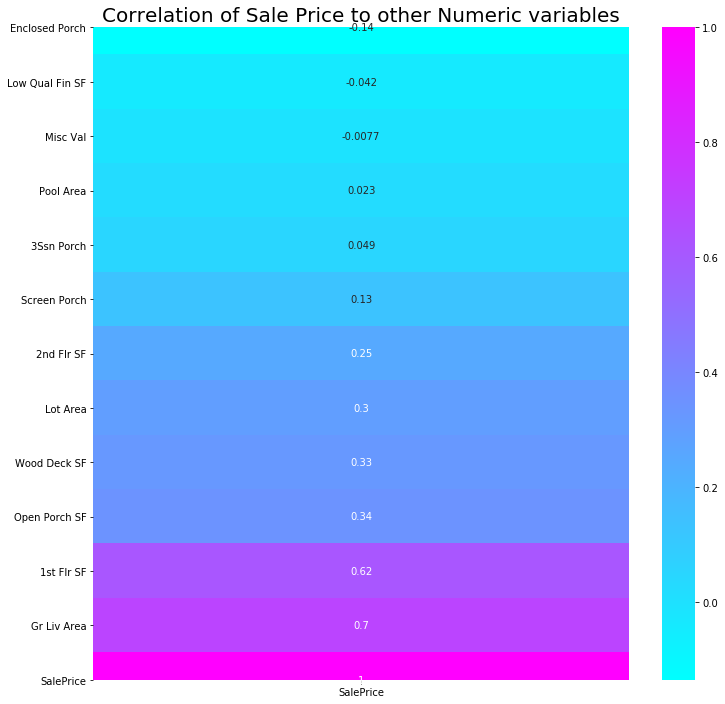

In [13]:
# Time to do a correlation heatmap!

plt.figure(figsize = (12, 12))
plt.title('Correlation of Sale Price to other Numeric variables', fontsize=20)
sns.heatmap(df_basic.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='cool')

So we can see that several items have very low correlations, despite having high significance. We can test these using a cross val score later.

We can probably go ahead and submit our first Kaggle CSV using just this data for the model. 

### EDA findings: 

Most of the null values are categorical that are associated with other features, eg Bsmt Qual is probably only populated when a house actually has a basement. This will be further confirmed as we dig more into feature selection.

Fortunately, it looks like most of the columns that are missing values are categorical in nature. This means that if we choose to use them as dummys, the NaNs will be ignored. We'll dig a little deeper on some of the others like Lot Frontage later. It may be the case that lot frontage is a NaN for categories like appartments and condos, in which case we can impute a proxy like the mean for all of those since the difference can be accounted for in another variable. Another option is imputing them with 0's and using an engineered feature like Lot Frontage * SubClassDummy.

## 4. Initial Modeling

We'll start with a model that only incorporates the numerical features that we have selected above and submit to Kaggle to see how we do relative to the rest of the cohorts. Because this data set has so many features, we'll do our subsequent EDA a little more piecemeal as we refine the model.

In [14]:
# we need to get everything into the right format for Kaggle, 
# which is a csv that only has the ID and predicted values

kaggle_test = pd.read_csv('./datasets/test.csv')
kaggle_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [15]:
submission = kaggle_test[['Id']].copy()
submission.head()

Id
0  2658
1  2718
2  2414
3  1989
4   625

In [16]:
test_features = df_basic.drop(columns='SalePrice').columns
X_kag_test = kaggle_test[test_features]
X_kag_test.head()
X_train = df_basic[test_features]
y_train = df_basic['SalePrice']

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
submission['SalePrice'] = lr.predict(X_kag_test)
submission.head()

Id      SalePrice
0  2658  181961.005726
1  2718  270534.396683
2  2414  151767.094678
3  1989   98925.883036
4   625  201856.822748

In [19]:
submission.to_csv('./submissions/submission_0.csv', index=False)

## 5. Model Refinement

### Automation

Lets start by automating some of the more repetive code that may come up. 

In [21]:
def fit_linear_reg(X, y):
    '''Fit a linear regression model to an already defined X and y
    
    Keyword Arguments:
    X -- the feature matrix 
    y -- the target values of the feature matrix
    
    Returns:
    model -- a linear regression model fit to X and y
    predicts -- the predictions of y based on X
    resids -- the y residuals'''
     
    model = LinearRegression()
    model.fit(X, y)
    predicts = model.predict(X)
    resids = y - predicts
    
    return model, predicts, resids

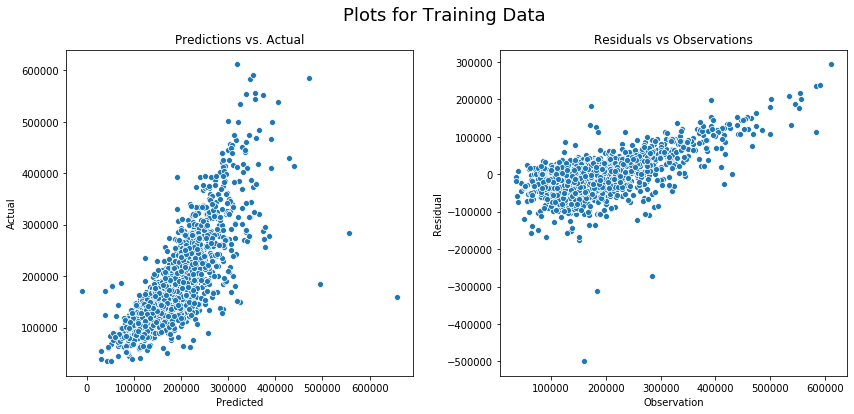

In [22]:
# Let's plot resids as a function as well:

def plot_resids(y, predictions, residuals, title):
    """Plots residuals vs Observations. Requires Seaborn as sns
    
    Keyword arguments:
    y - the dependent variable training data/observed data
    predictions -- The output of a model
    residuals -- The matched residuals of the above output
    
    Returns:
    Two scatterplots: predictions vs actual values and residual vs actual values
    """
    
    fig, (ax1, ax2) = plt.subplots(figsize = (14, 6), ncols=2)
    plt.subplots_adjust(wspace = 0.25)
    fig.suptitle(title, fontsize=18)
    
    sns.scatterplot(predictions, y, ax=ax1)
    ax1.set_title("Predictions vs. Actual")
    ax1.set_ylabel("Actual")
    ax1.set_xlabel("Predicted")

    sns.scatterplot(y, residuals, ax=ax2)
    ax2.set_title('Residuals vs Observations')
    ax2.set_ylabel("Residual")
    ax2.set_xlabel("Observation")
    
    
plot_resids(y, preds, resids, "Plots for Training Data")

In [23]:
# How about doing this for metrics too?

def print_lr_metrics(lr, X, y):
    """Prints MAE, MSE, SSE, RSE, R2, R2_adj, and K-fold cross val score for k=5
    
    Keyword Arguments:
    lr -- the model used to generate the predictions
    X -- independent matrix used to generate the predictions
    y -- the observed dependent variable associated with X
    predictions -- the predictions associated with X
    
            
    Returns:
    printed output of the previously mentioned metrics
    """
    predictions = lr.predict(X)
    residuals = y - predictions
    sum_sq_err = (residuals ** 2).sum()
    mae = metrics.mean_absolute_error(y, predictions)
    mse = metrics.mean_squared_error(y, predictions)
    r_2 = lr.score(X, y)
    n, k = X.shape
    r2_adj = 1 - (((1 - r_2) * (n-1)) / (n-k-1))
    cv_score = cross_val_score(lr, X, y, cv=5).mean()
    print('The mean of residuals is: ', residuals.mean())
    print('The Mean Absolute Error: ', mae)
    print('The Sum Squared Error: ', sum_sq_err)
    print('The Mean Squared Error: ', mse)
    print('The Root Mean Squared Error: ', np.sqrt(mse))
    print('The Coefficient of Determination: ', r_2)
    print('The Adjusted Coefficient of Determination: ', r2_adj)
    print('The 5-fold cross validation score: ', cv_score)
    
print_lr_metrics(lr, X, y)

The mean of residuals is:  2.984279490192421e-13
The Mean Absolute Error:  33110.66838578555
The Sum Squared Error:  4801465391064.798
The Mean Squared Error:  2344465522.9808583
The Root Mean Squared Error:  48419.68115323415
The Coefficient of Determination:  0.6248728705096203
The Adjusted Coefficient of Determination:  0.6226608186403895
The 5-fold cross validation score:  0.5977127159945991


In [24]:
def model_score_compare(model, X_train, y_train, X_test, y_test):
    '''Compare the scores of training data and testing data
    
    Keyword Arguments:
    model -- the fitted model
    X_train -- X training matrix
    y_train -- y training series
    X_test -- X testing matrix
    y_test -- y testing series
    
    Returns:
    train_score -- the model training score
    test_score -- the model testing score'''
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

In [25]:
# finally, lets make a function that automatically creates 
# a Kaggle submission CSV

# instantiate a counter

kag_counter = 1

def create_kaggle_csv(model, X_test_data, counter, test_data=kaggle_test, y_index=['Id'], y_name='SalePrice', log=True ):
    """Creates a Kaggle file for submission with suffix kag_counter
    
    Keyword Arguments:
    model -- the fitted model that will be used to make predictions
    X_test_data -- the dataframe for the test dataset used to make predicitons
    test_data -- the data frame from which the test data was taken
    y_index -- the column of the test data used to index the predictions
    y_name -- the column name in the target CSV for the predictions 
                    NOTE: X_test_data **MUST** be in the same format as the model!!
                    Make sure that any transforms and/or scaling is done first!!
                    
    Returns:
    A CSV file with the index and predicted values
    A statement that lets you know the ordinal of this submission"""
    
    output_name = "submission_" + str(counter) +'.csv'
    submission = test_data[y_index].copy()
    submission[y_name] = model.predict(X_test_data)
    if log == True:
        submission[y_name] = np.exp(submission[y_name])
    submission.to_csv('./submissions/' + output_name, index=False)
    print("This is submission number: ", counter)
    counter += 1
    return counter

### Basic Feature Generation

Our dependent feature is 'SalePrice', although given the distribution, it may be more beneficial to use the ln of this feature.

Now that we're getting into more robust modelling, we need to split the data into training and testing sets. Then we'll start refining the model by doing a polynomial expansion of our numerical features, then determining which of them are important via regularization with Lasso.

In [26]:
# now that we have some functions built, let's play around with some features!
y_targ = 'SalePrice'

# going back to the original dataframe, there are a few columns I want to dummy.
# before we get that far though, we should train/test/split our data and
# try a poly fit for our numeric data. 

X_targ = df_basic.drop(columns=[y_targ])
y = df_basic[y_targ]

X_train, X_test, y_train, y_test = train_test_split(X_targ, y, test_size = 0.2, random_state = 42)

In [27]:
poly = PolynomialFeatures()

X_train_pf = poly.fit_transform(X_train)
X_test_pf = poly.transform(X_test)

X_train_pf = pd.DataFrame(X_train_pf, columns=poly.get_feature_names(X_targ.columns))
X_test_pf = pd.DataFrame(X_test_pf, columns=poly.get_feature_names(X_targ.columns))

In [28]:
lr_poly, poly_preds, poly_resids = fit_linear_reg(X_train_pf, y_train)

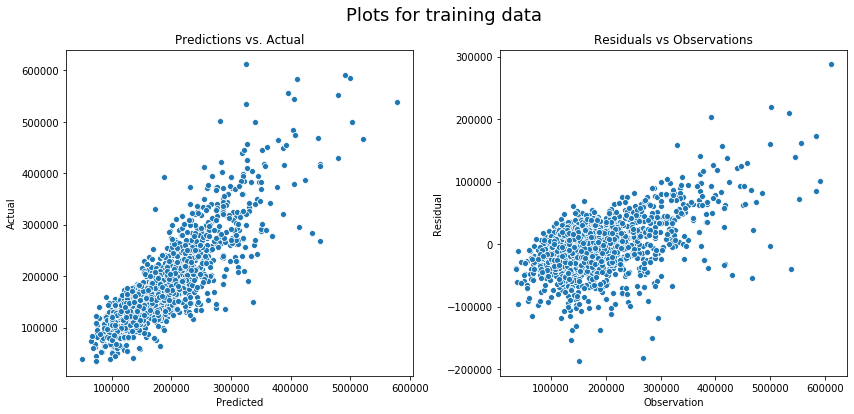

In [29]:
plot_resids(y_train, poly_preds, poly_resids, "Plots for training data")

In [30]:
# we definitely have a kind of shotgun spread to the residuals. 
# a log conversion might be in order here.

print_lr_metrics(lr_poly, X_train_pf, y_train)

The mean of residuals is:  -1.2561909727051727e-11
The Mean Absolute Error:  28824.253129794994
The Sum Squared Error:  2705363434761.1367
The Mean Squared Error:  1651626028.5477026
The Root Mean Squared Error:  40640.202122377574
The Coefficient of Determination:  0.7409630359500815
The Adjusted Coefficient of Determination:  0.7257157114167422
The 5-fold cross validation score:  -0.9641291662136682


In [31]:
# thats a very odd cross val score, so lets confirm
cross_val_score(lr_poly, X_train_pf, y_train, cv=5)

array([ 0.68043222, -7.34158861,  0.54404361,  0.63462719,  0.66183976])

In [32]:
# I suspect we have an outlier. . . 

In [33]:
model_score_compare(lr_poly, X_train_pf, y_train, X_test_pf, y_test)

The training score is:  0.7409630359500815
The testing score is:   0.5055144084999466


In [34]:
# in it's current state, the model seems to be pretty overfit to the data
# lets try the log conversion first to see how that affects residuals:

y_train_ln = np.log(y_train)
y_test_ln = np.log(y_test)

lr_poly_ln, poly_preds_ln, resids_poly_ln = fit_linear_reg(X_train_pf, y_train_ln)

In [35]:
model_score_compare(lr_poly_ln, X_train_pf, y_train_ln, X_test_pf, y_test_ln)

The training score is:  0.7291444451571548
The testing score is:   0.20446448850518673


In [36]:
print_lr_metrics(lr_poly_ln, X_train_pf, y_train_ln)

The mean of residuals is:  2.1277241263145857e-15
The Mean Absolute Error:  0.15868783838688585
The Sum Squared Error:  72.76496381262547
The Mean Squared Error:  0.04442305483066268
The Root Mean Squared Error:  0.21076777464940574
The Coefficient of Determination:  0.7291444451571548
The Adjusted Coefficient of Determination:  0.713201459716858
The 5-fold cross validation score:  -1.195053855876568


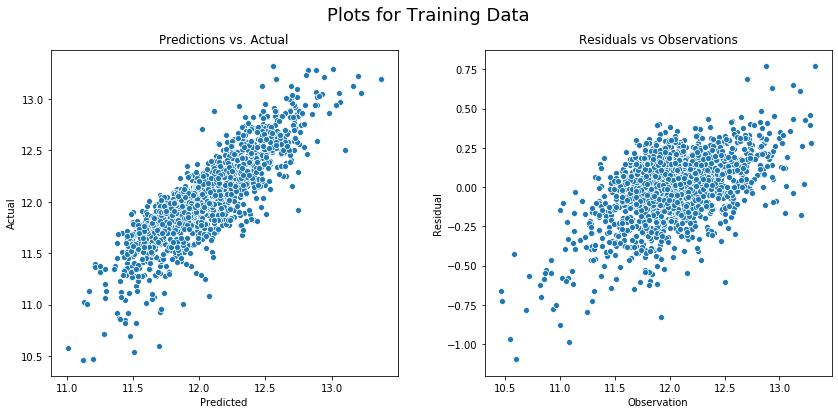

In [37]:
plot_resids(y_train_ln, poly_preds_ln, resids_poly_ln, "Plots for Training Data")

In [38]:
# Let's scale everything then use a LassoCV to narrow down some of these variables!

ss = StandardScaler()
Z_train = ss.fit_transform(X_train_pf)
Z_test = ss.transform(X_test_pf);

In [39]:
# since we have no idea whatsoever what the alpha should be, lets just iterate through a big 
# space. 

lasso_alphas = np.logspace(-4, 0, 1_000)
lasso = LassoCV(alphas=lasso_alphas, cv=5, max_iter=5_000)

lasso.fit(Z_train, y_train_ln);

In [40]:
lasso.score(Z_train, y_train_ln)

0.7096567354031229

In [41]:
lasso.score(Z_test, y_test_ln)

0.33660126548308034

In [42]:
lasso.alpha_

0.003292437333007769

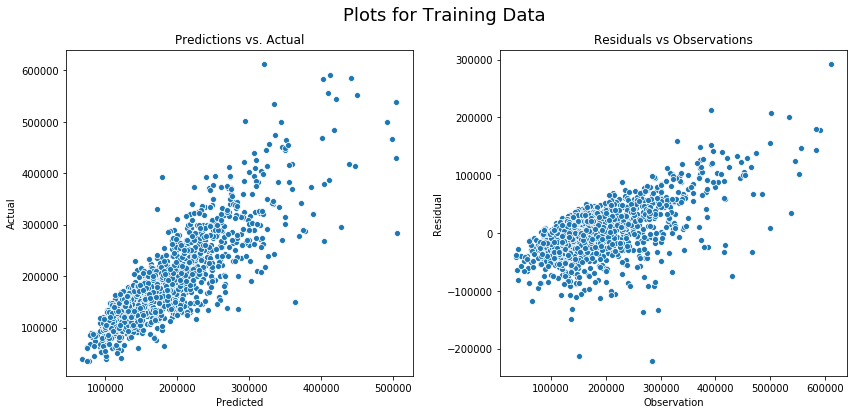

In [43]:
# definitely a major improvement! We've only sacrificed a small amount of 
# bias for a pretty big leap in the improvement of the variance
# lets take a look at the plots

preds = np.exp(lasso.predict(Z_train))
resids = np.exp(y_train_ln) - preds
plot_resids(y_train, preds, resids, 'Plots for Training Data')

Now that we have a better aggreement between our training set and testing set, lets go ahead and predict values for the test.csv and submit to Kaggle to see how we're doing! First, we need to do the same polynomial transform on the Kaggle test set:

In [44]:
# first, let's make sure that our kaggle test data has the same number of columns as our train data.
X_train.shape

(1638, 12)

In [45]:
X_kag_test.shape

(878, 12)

In [46]:
# now we can poly transform the kaggle test data 
X_kag_test_pf = poly.transform(X_kag_test)
X_kag_test_pf.shape

(878, 91)

In [47]:
Z_train.shape

(1638, 91)

In [48]:
# now we need to scale the kaggle test data:
Z_test_kag = ss.transform(X_kag_test_pf)

In [49]:
# now we can generate our predictions and CSV:
kag_counter = 1
kag_counter = create_kaggle_csv(lasso, Z_test_kag, kag_counter)

This is submission number:  1


In [50]:
kag_counter

2

In [51]:
# This submission was a definite improvement over the previous!
# Now let's take a look at the variables that the model discarded and only keep those for future modeling:

lasso_betas = pd.Series(index = poly.get_feature_names(X.columns), data = lasso.coef_)
lasso_betas[lasso_betas != 0]

Lot Area                         0.025767
1st Flr SF                       0.166974
Low Qual Fin SF                 -0.013465
Gr Liv Area                      0.276556
Wood Deck SF                     0.083391
Open Porch SF                    0.107005
Enclosed Porch                  -0.031585
Lot Area 1st Flr SF             -0.033460
Lot Area Low Qual Fin SF        -0.009462
Lot Area Wood Deck SF            0.009100
Lot Area Enclosed Porch         -0.002888
Lot Area Screen Porch            0.001237
Lot Area Pool Area              -0.046809
1st Flr SF 2nd Flr SF           -0.019652
1st Flr SF Gr Liv Area          -0.117265
1st Flr SF Wood Deck SF          0.026710
1st Flr SF Enclosed Porch       -0.000664
1st Flr SF Screen Porch          0.026725
2nd Flr SF^2                     0.006555
2nd Flr SF Low Qual Fin SF      -0.011511
2nd Flr SF Wood Deck SF         -0.016192
2nd Flr SF Screen Porch         -0.000837
Low Qual Fin SF Open Porch SF   -0.017175
Low Qual Fin SF Screen Porch    -0

In [52]:
poly_feature_list = list(lasso_betas[lasso_betas > 0].index)
poly_feature_list

['Lot Area',
 '1st Flr SF',
 'Gr Liv Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Lot Area Wood Deck SF',
 'Lot Area Screen Porch',
 '1st Flr SF Wood Deck SF',
 '1st Flr SF Screen Porch',
 '2nd Flr SF^2',
 'Gr Liv Area 3Ssn Porch',
 'Open Porch SF Enclosed Porch',
 'Open Porch SF 3Ssn Porch',
 'Enclosed Porch Screen Porch',
 'Pool Area^2']

In [53]:
# Now we have some features narrowed down. Time to add some dummies!

### Feature Generation Continued

15 features of the polynomial model have been retained for future model development.

The next step will be to explore dummy features that contribute to the model. 

Features to be dummied then tested:

1. Features that are ordinal
2. Features that are discrete
3. Features that are nominal


If none of these improve the model much, then we can move on to other features.

#### Ordinal Features:

Lets make a list of the features that are ordinal:

In [54]:
# we'll start with Sale Type.
# first we need to do the poly transform

df_poly = df_basic.drop(columns=['SalePrice'])
df_poly = poly.transform(df_poly)
df_poly = pd.DataFrame(df_poly, columns=(poly.get_feature_names(X.columns)))
df_poly.head()

1  Lot Area  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0  1.0   13517.0       725.0       754.0              0.0       1479.0   
1  1.0   11492.0       913.0      1209.0              0.0       2122.0   
2  1.0    7922.0      1057.0         0.0              0.0       1057.0   
3  1.0    9802.0       744.0       700.0              0.0       1444.0   
4  1.0   14235.0       831.0       614.0              0.0       1445.0   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0           0.0           44.0             0.0         0.0           0.0   
1           0.0           74.0             0.0         0.0           0.0   
2           0.0           52.0             0.0         0.0           0.0   
3         100.0            0.0             0.0         0.0           0.0   
4           0.0           59.0             0.0         0.0           0.0   

   Pool Area  Misc Val   Lot Area^2  Lot Area 1st Flr SF  Lot Area 2nd Flr SF  \
0        0.0       0.0  182709289.0            9799825.0           10191818.0   
1        0.0       0.0  132066064.0           10492196.0           13893828.0   
2        0.0       0.0   62758084.0            8373554.0                  0.0   
3        0.0       0.0   96079204.0            7292688.0            6861400.0   
4        0.0       0.0  202635225.0           11829285.0            8740290.0   

   Lot Area Low Qual Fin SF  Lot Area Gr Liv Area  Lot Area Wood Deck SF  \
0                       0.0            19991643.0                    0.0   
1                       0.0            24386024.0                    0.0   
2                       0.0             8373554.0                    0.0   
3                       0.0            14154088.0               980200.0   
4                       0.0            20569575.0                    0.0   

   Lot Area Open Porch SF  Lot Area Enclosed Porch  Lot Area 3Ssn Porch  \
0                594748.0                      0.0                  0.0   
1                850408.0                      0.0                  0.0   
2                411944.0                      0.0                  0.0   
3                     0.0                      0.0                  0.0   
4                839865.0                      0.0                  0.0   

   Lot Area Screen Porch  Lot Area Pool Area  Lot Area Misc Val  1st Flr SF^2  \
0                    0.0                 0.0                0.0      525625.0   
1                    0.0                 0.0                0.0      833569.0   
2                    0.0                 0.0                0.0     1117249.0   
3                    0.0                 0.0                0.0      553536.0   
4                    0.0                 0.0                0.0      690561.0   

   1st Flr SF 2nd Flr SF  1st Flr SF Low Qual Fin SF  1st Flr SF Gr Liv Area  \
0               546650.0                         0.0               1072275.0   
1              1103817.0                         0.0               1937386.0   
2                    0.0                         0.0               1117249.0   
3               520800.0                         0.0               1074336.0   
4               510234.0                         0.0               1200795.0   

   1st Flr SF Wood Deck SF  1st Flr SF Open Porch SF  \
0                      0.0                   31900.0   
1                      0.0                   67562.0   
2                      0.0                   54964.0   
3                  74400.0                       0.0   
4                      0.0                   49029.0   

   1st Flr SF Enclosed Porch  1st Flr SF 3Ssn Porch  1st Flr SF Screen Porch  \
0                        0.0                    0.0                      0.0   
1                        0.0                    0.0                      0.0   
2                        0.0                    0.0                      0.0   
3                        0.0                    0.0                      0.0   
4  

In [55]:
# now we create a dataframe with just the features we saved

df_refined = df_poly[poly_feature_list]
df_refined.shape

(2048, 15)

In [56]:
# while we're at it, lets do the same for the Kaggle test data:

df_kag_poly = poly.transform(X_kag_test)
df_kag_poly = pd.DataFrame(df_kag_poly, columns=(poly.get_feature_names(X.columns)))
df_kag_ref = df_kag_poly[poly_feature_list]
df_kag_ref.shape

(878, 15)

In [57]:
# now lets get the dummies. we'll concatenate the kaggle test set, then seperate
# so that we can make sure there are the same number of dummy columns. Code inspired by:
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data

# first, we need to concatenate the kaggle test data to the original dataframe:
data_df = df.drop(columns='SalePrice')
data_all = pd.concat([data_df, kaggle_test], axis=0)
data_all.index = list(range(len(data_all)))
data_all.shape

(2926, 80)

In [58]:
# now we get the number of items in our test set with refined features:
df_ref_rows = len(df_refined)

In [59]:
# now we can concatenate the refined training data to the refined kaggle test data:
data_ref = pd.concat([df_refined, df_kag_ref], axis=0)
data_ref.index = list(range(len(data_ref)))
data_ref.shape

(2926, 15)

In [60]:
# get the dummies from the training/kaggle dataset made above:
data_dummy = pd.get_dummies(data_all['Sale Type'], drop_first=True)
data_dummy.shape

(2926, 9)

In [61]:
# concat the data and the dummies:
data_w_dum = pd.concat([data_ref, data_dummy], axis=1, ignore_index=True)

In [62]:
# now seperate back into seperate training and kaggle test sets:
df_ref = data_w_dum[:df_ref_rows]
df_kag = data_w_dum[df_ref_rows:]

In [63]:
# now we can train/test/split

X = df_ref
y = np.log(df['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# lets start with a regular linear regression model:

lr_st, st_preds, st_resids = fit_linear_reg(X_train, y_train)

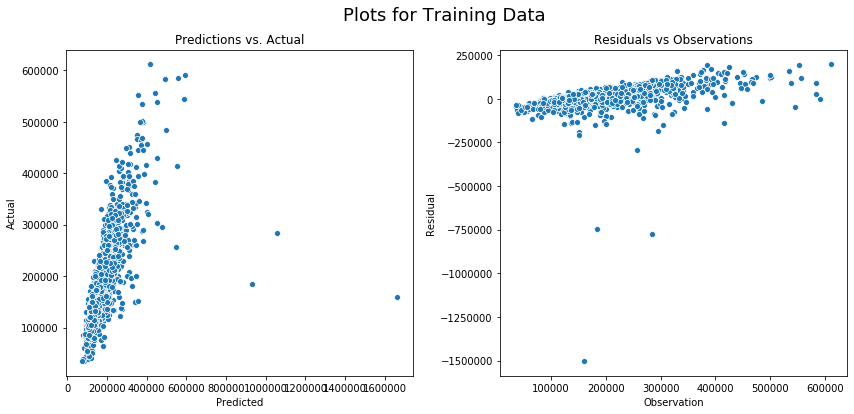

In [65]:
# now lets see how it does:

y_train_exp = np.exp(y_train)
st_preds_exp = np.exp(st_preds)
st_resids_exp = y_train_exp - st_preds_exp

plot_resids(y_train_exp, st_preds_exp, st_resids_exp, "Plots for Training Data")

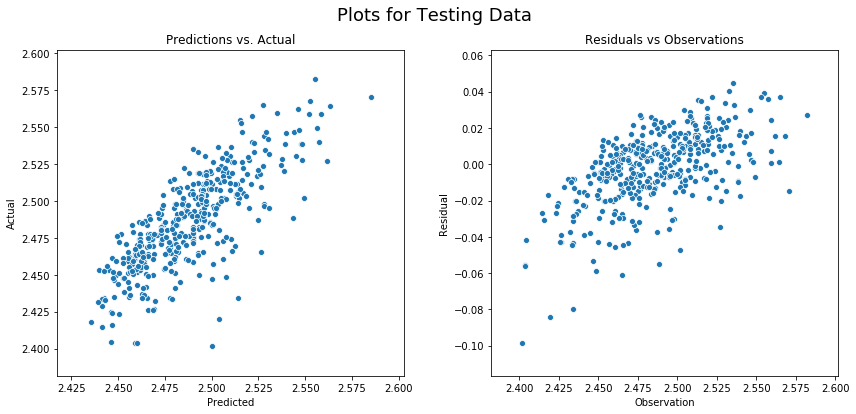

In [66]:
y_test_preds = lr_st.predict(X_test)
y_test_exp = np.log(y_test)
y_test_preds_exp = np.log(y_test_preds)
test_resids = y_test_exp - y_test_preds_exp
plot_resids(y_test_exp, y_test_preds_exp, test_resids, "Plots for Testing Data")

In [67]:
print_lr_metrics(lr_st, X_train, y_train)

The mean of residuals is:  1.7167111579796071e-15
The Mean Absolute Error:  0.1774233135700778
The Sum Squared Error:  96.17435959412032
The Mean Squared Error:  0.058714505246715704
The Root Mean Squared Error:  0.24231076172286634
The Coefficient of Determination:  0.6420068372932946
The Adjusted Coefficient of Determination:  0.6366802186293385
The 5-fold cross validation score:  0.6151358853416345


In [68]:
model_score_compare(lr_st, X_train, y_train, X_test, y_test)

The training score is:  0.6420068372932946
The testing score is:   0.6206857756127965


The mean of residuals is:  8.350395398890066e-16
The Mean Absolute Error:  0.07869257931828043
The Sum Squared Error:  19.380792244685118
The Mean Squared Error:  0.011831985497365761
The Root Mean Squared Error:  0.10877493046362181
The Coefficient of Determination:  0.927858203156046
The Adjusted Coefficient of Determination:  0.918554399011343
The 5-fold cross validation score:  0.8615064143622793
The training score is:  0.927858203156046
The testing score is:   0.9022147053070397
None


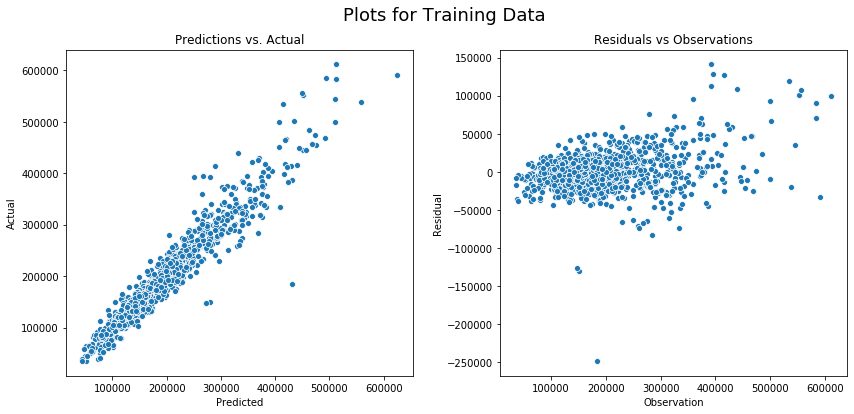

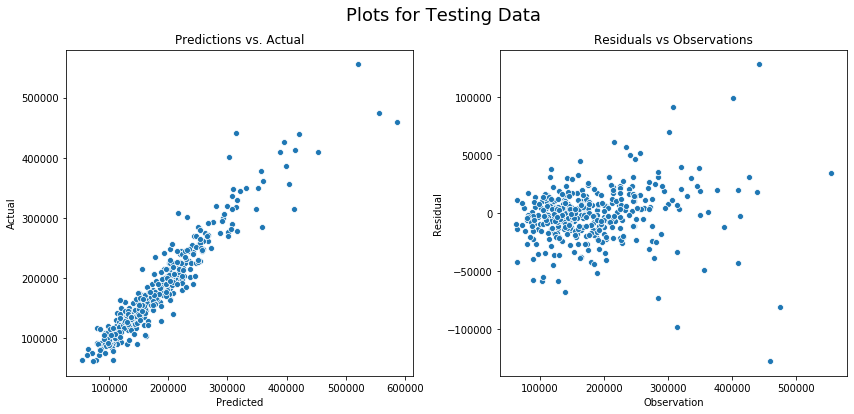

In [134]:
# sale type didn't really seem to do much, but we'll be running these exact lines of 
# code for a while, so lets make a function to automate it

def add_dummies_fit_plot(dummy, data_ref, data=data_all, rows=df_ref_rows):
    '''This function will automatically add a dummy column, evaluate it, plot the predictions 
    and residuals, then return the refined dataset with dummies and the kaggle test data with dummies
    
    Keyword Arguments: 
    dummy -- the name of the column for which we want to create dummies
    data_ref -- the X dataset that contains training data + kaggle data as well as the features 
                we have decided to keep
    data -- the full dataset, defaulted to data_all
    rows -- the number of rows of training data 
            (where we will divide the training data from the kaggle test data)
            
    Returns: 
    model -- the fitted Linear Regression
    data_w_dum -- the refined dataset with the new dummies
    df_kag -- the kaggle test dataset with the new dummies'''
    
    data_dummies = pd.get_dummies(data_all, columns=dummy, prefix=str(dummy), drop_first=True)
    data_w_dum = pd.concat([data_ref, data_dummies], axis=1)
    df_ref = data_w_dum[:df_ref_rows]
    df_kag = data_w_dum[df_ref_rows:]
    
    X = df_ref
    y = np.log(df['SalePrice'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr, preds, resids = fit_linear_reg(X_train, y_train)
    
    print_lr_metrics(lr, X_train, y_train)
    
    print(model_score_compare(lr, X_train, y_train, X_test, y_test))
    
    y_train_exp = np.exp(y_train)
    preds_exp = np.exp(preds)
    resids_exp = y_train_exp - preds_exp
    
    plot_resids(y_train_exp, preds_exp, resids_exp, "Plots for Training Data")
    
    y_test_preds = lr.predict(X_test)
    y_test_exp = np.exp(y_test)
    y_test_preds_exp = np.exp(y_test_preds)
    test_resids = y_test_exp - y_test_preds_exp
    
    plot_resids(y_test_exp, y_test_preds_exp, test_resids, "Plots for Testing Data")
    
    return lr, data_dummies, df_kag

lr, data_w_dum, df_kag = add_dummies_and_fit(['Street'], data_ref)

In [135]:
data_w_dum.head()

Lot Area  1st Flr SF  Gr Liv Area  Wood Deck SF  Open Porch SF  \
0   13517.0       725.0       1479.0           0.0           44.0   
1   11492.0       913.0       2122.0           0.0           74.0   
2    7922.0      1057.0       1057.0           0.0           52.0   
3    9802.0       744.0       1444.0         100.0            0.0   
4   14235.0       831.0       1445.0           0.0           59.0   

   Lot Area Wood Deck SF  Lot Area Screen Porch  1st Flr SF Wood Deck SF  \
0                    0.0                    0.0                      0.0   
1                    0.0                    0.0                      0.0   
2                    0.0                    0.0                      0.0   
3               980200.0                    0.0                  74400.0   
4                    0.0                    0.0                      0.0   

   1st Flr SF Screen Porch  2nd Flr SF^2  Gr Liv Area 3Ssn Porch  \
0                      0.0      568516.0                     0.0   
1                      0.0     1461681.0                     0.0   
2                      0.0           0.0                     0.0   
3                      0.0      490000.0                     0.0   
4                      0.0      376996.0                     0.0   

   Open Porch SF Enclosed Porch  Open Porch SF 3Ssn Porch  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   Enclosed Porch Screen Porch  Pool Area^2  Overall Cond_2  Overall Cond_3  \
0                          0.0          0.0               0               0   
1                          0.0          0.0               0               0   
2                          0.0          0.0               0               0   
3                          0.0          0.0               0               0   
4                          0.0          0.0               0               0   

   Overall Cond_4  Overall Cond_5  Overall Cond_6  Overall Cond_7  \
0               0               0               0               0   
1               0               1               0               0   
2               0               0               0               1   
3               0               1               0               0   
4               0               0               0               0   

   Overall Cond_8  Overall Cond_9  Overall Qual_2  Overall Qual_3  \
0               1               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               1               0               0               0   

   Overall Qual_4  Overall Qual_5  Overall Qual_6  Overall Qual_7  \
0               0               0               1               0   
1               0               0               0               1   
2               0               1               0               0   
3               0               1               0               0   
4               0               0               1               0   

   Overall Qual_8  Overall Qual_9  Overall Qual_10  Neighborhood_Blueste  \
0               0               0                0                     0   
1               0               0                0                     0   
2               0               0                0                     0   
3               0               0                0                     0   
4               0               0                0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                

In [70]:
# so that is a pretty significant improvement, both for bias and variance
# lets re-write our refined data to match the data_w_dum, since we 
# want to keep these variables

data_ref = data_w_dum
data_ref.shape

(2926, 23)

The mean of residuals is:  1.1029028728144412e-15
The Mean Absolute Error:  0.12361474099334895
The Sum Squared Error:  46.978374939793994
The Mean Squared Error:  0.028680326581070816
The Root Mean Squared Error:  0.1693526692469617
The Coefficient of Determination:  0.825130761520075
The Adjusted Coefficient of Determination:  0.8216442720301326
The 5-fold cross validation score:  0.7958903067453853
The training score is:  0.825130761520075
The testing score is:   0.8333229350584319
None


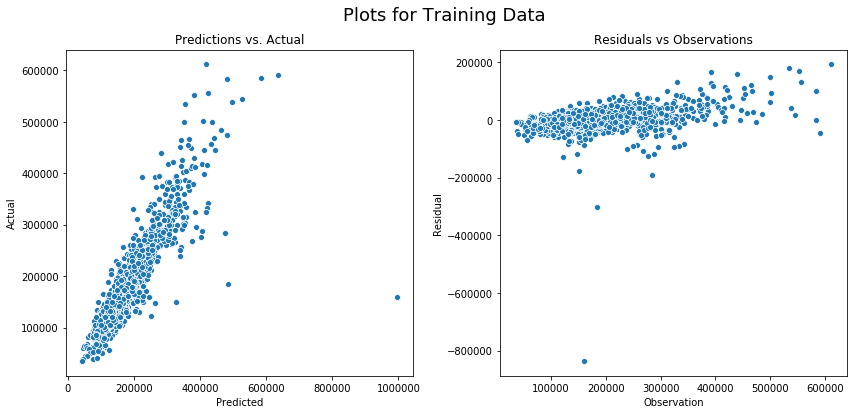

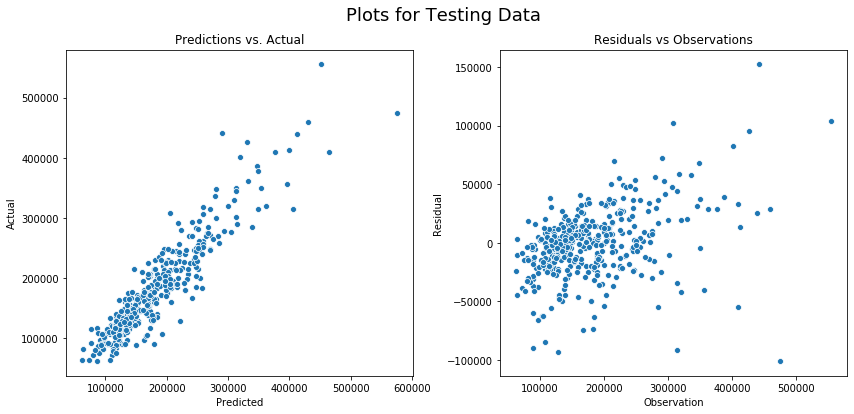

In [71]:
# not going to submit to kaggle just yet, though
# now lets add in the Overall Qual as dummies

lr, data_w_dum, df_kag = add_dummies_and_fit('Overall Qual', data_ref)

In [72]:
# wow, big advances in both bias and variance with that one!
# let's save those variables and submit that to Kaggle!

data_ref = data_w_dum

kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

This is submission number:  2


The mean of residuals is:  1.9390268796383685e-15
The Mean Absolute Error:  0.10438407782083355
The Sum Squared Error:  33.80076255082678
The Mean Squared Error:  0.020635386172665922
The Root Mean Squared Error:  0.1436502216241448
The Coefficient of Determination:  0.8741822463020734
The Adjusted Coefficient of Determination:  0.8694780337113398
The 5-fold cross validation score:  0.846031042668308
The training score is:  0.8741822463020734
The testing score is:   0.8602556322762731
None


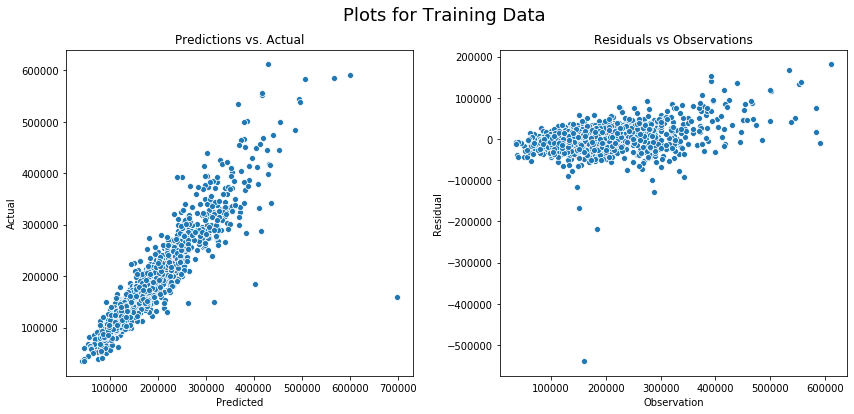

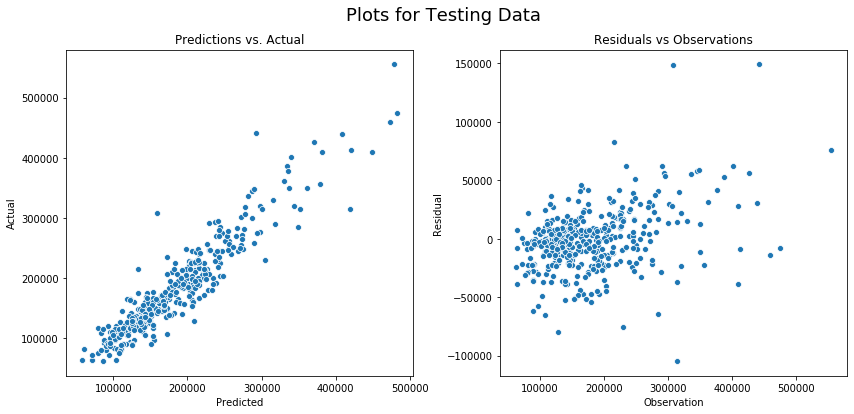

In [73]:
# now lets add the neighborhood

lr, data_w_dum, df_kag = add_dummies_and_fit('Neighborhood', data_ref)

In [74]:
# so, starting to show some bias/variance tradeoff here. Still worth submitting!
data_ref = data_w_dum
kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

This is submission number:  3


The mean of residuals is:  9.489085680556893e-16
The Mean Absolute Error:  0.10359023198364654
The Sum Squared Error:  33.332279262597545
The Mean Squared Error:  0.02034937683919264
The Root Mean Squared Error:  0.14265124198265025
The Coefficient of Determination:  0.8759260979350473
The Adjusted Coefficient of Determination:  0.8707958157249824
The 5-fold cross validation score:  0.8430982816440216
The training score is:  0.8759260979350473
The testing score is:   0.8596449566440109
None


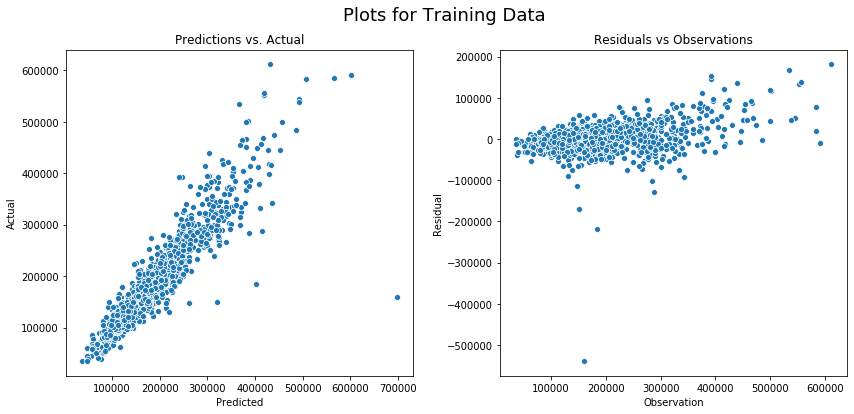

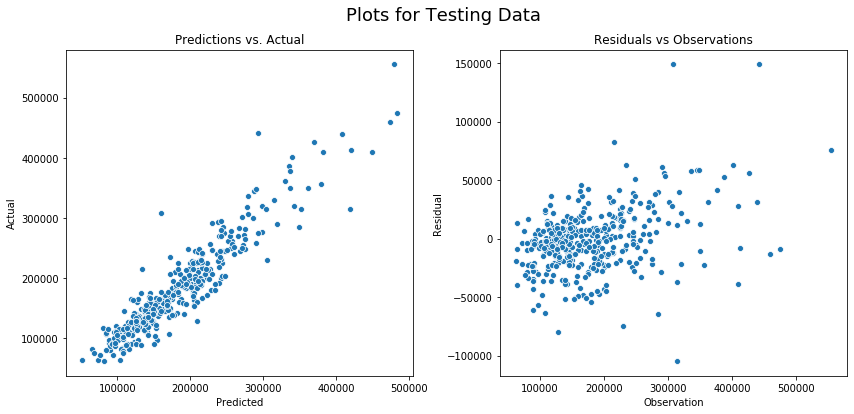

In [75]:
# I think the next item to try is probably zoning:

lr, data_w_dum, df_kag = add_dummies_and_fit('MS Zoning', data_ref)

The mean of residuals is:  1.1668864219747677e-15
The Mean Absolute Error:  0.09972821669691138
The Sum Squared Error:  31.46218946265555
The Mean Squared Error:  0.01920768587463709
The Root Mean Squared Error:  0.13859179584173476
The Coefficient of Determination:  0.8828871982205304
The Adjusted Coefficient of Determination:  0.8773425102284123
The 5-fold cross validation score:  0.8538133772426202
The training score is:  0.8828871982205304
The testing score is:   0.8678821036992783
None


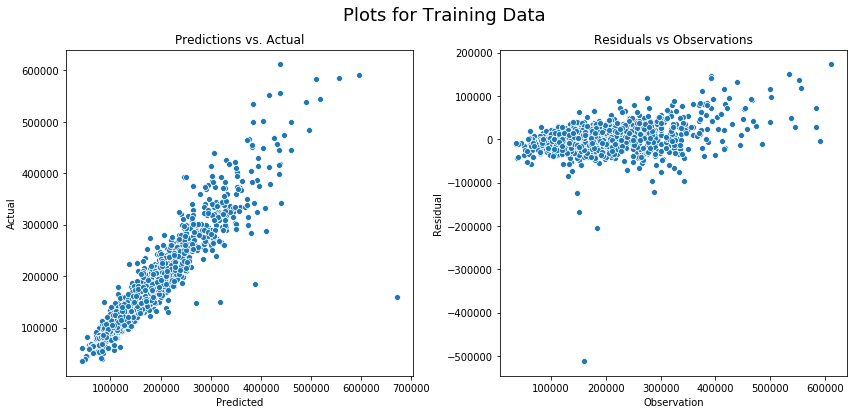

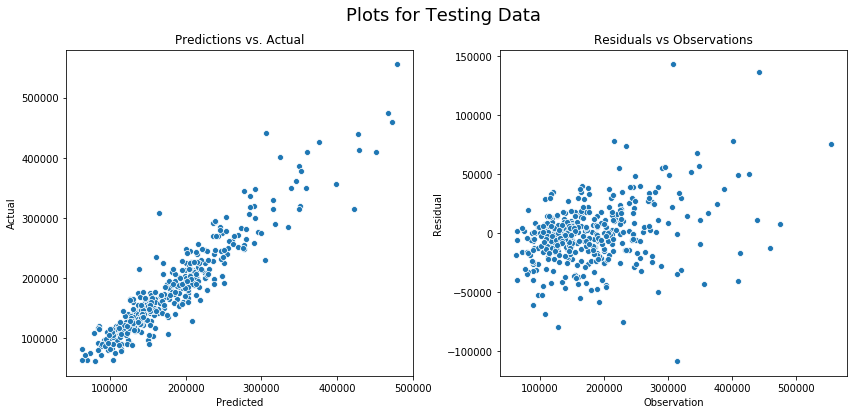

In [76]:
# this one only incrementally increased bias, with a corresponding increase in variance
# Probably not worth keeping

# in our orignal list, we've now tested everything except subclass. Let's try that, 
# then see if we want to find some other items to look at

lr, data_w_dum, df_kag = add_dummies_and_fit('MS SubClass', data_ref)

In [77]:
# subclass didn't really improve our bias, but definitely improved our variance
# lets keep it and submit

data_ref = data_w_dum
kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

This is submission number:  4


### Feature Generation part 3

We've got a pretty good looking model now, but I think it can be better!

There are plenty of other features worth exploring:

1. Bldg Type is the low hanging fruit from what is left
2. Condition is actually a pair of columns. We can simplify that a little by adding them together before we dummy
3. Exterior is similar to Condition
4. House Style might be worth exploring
5. exterior quality 
5. exterior condition - because we often judge things on how they look
6. Foundation 
7. Roof Style
8. Roof Matl
9. Year Built
10. Year Remod/Add
11. lot config


The mean of residuals is:  8.936007543747292e-16
The Mean Absolute Error:  0.09938725635100794
The Sum Squared Error:  31.36914027075644
The Mean Squared Error:  0.019150879286176092
The Root Mean Squared Error:  0.1383867019846058
The Coefficient of Determination:  0.8832335584628637
The Adjusted Coefficient of Determination:  0.8773914914712686
The 5-fold cross validation score:  0.8542665962585076
The training score is:  0.8832335584628637
The testing score is:   0.8685117585799219
None


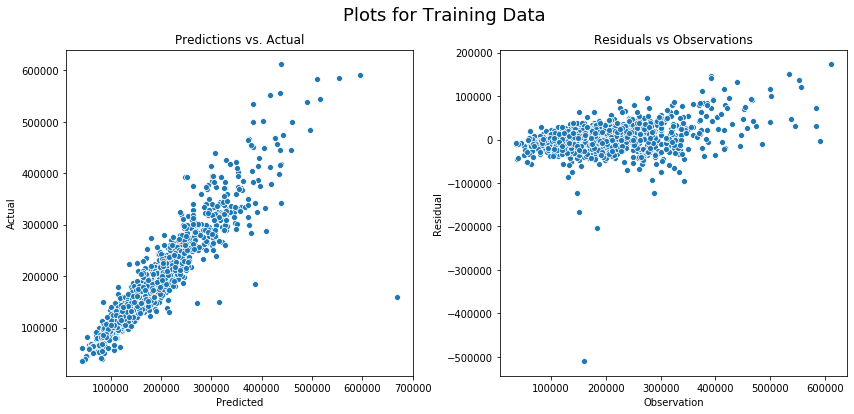

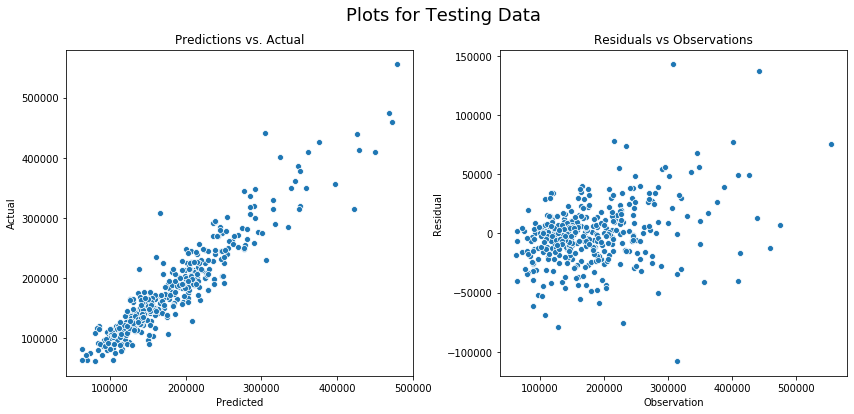

In [78]:
# Lets start with bldg type:

lr, data_w_dum, df_kag = add_dummies_and_fit('Bldg Type', data_ref)

In [79]:
# so this is a very incremental improvement, so we'll keep it, but not submit as yet

data_ref = data_w_dum

The mean of residuals is:  2.0984435190717245e-15
The Mean Absolute Error:  0.09704741491819106
The Sum Squared Error:  30.2013065126556
The Mean Squared Error:  0.018437916063892307
The Root Mean Squared Error:  0.13578628820279426
The Coefficient of Determination:  0.8875806266663075
The Adjusted Coefficient of Determination:  0.8815762457224874
The 5-fold cross validation score:  0.8584951425156142
The training score is:  0.8875806266663075
The testing score is:   0.8743723801480847
None


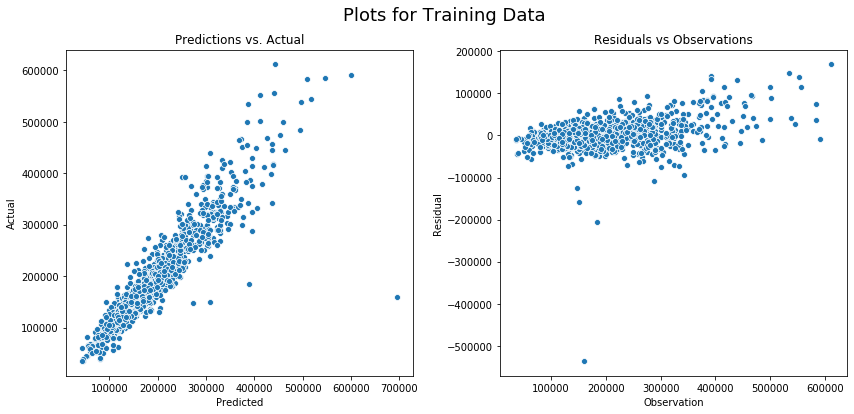

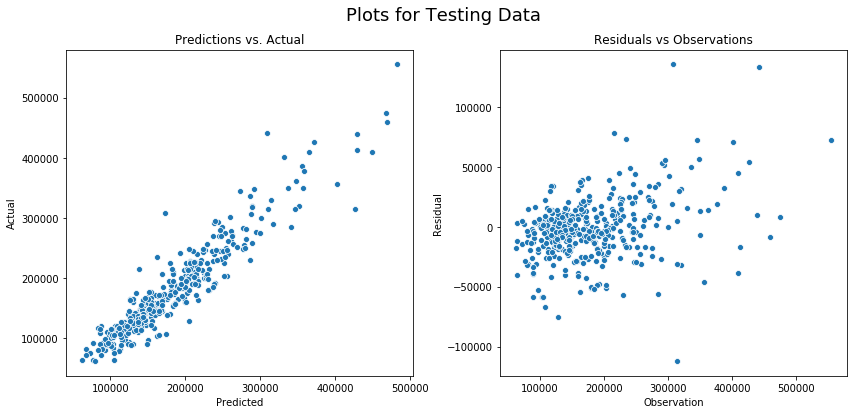

In [80]:
# I'm going to try foundation next:
lr, data_w_dum, df_kag = add_dummies_and_fit('Foundation', data_ref)

In [81]:
# another incremental improvement. Let's save it and keep going

data_ref = data_w_dum

The mean of residuals is:  1.062777596222372e-15
The Mean Absolute Error:  0.09639047275314755
The Sum Squared Error:  29.913799965300992
The Mean Squared Error:  0.018262393141209397
The Root Mean Squared Error:  0.1351384221500658
The Coefficient of Determination:  0.8886508222841493
The Adjusted Coefficient of Determination:  0.8821728481442485
The 5-fold cross validation score:  0.8583057183020226
The training score is:  0.8886508222841493
The testing score is:   0.8748666993320885
None


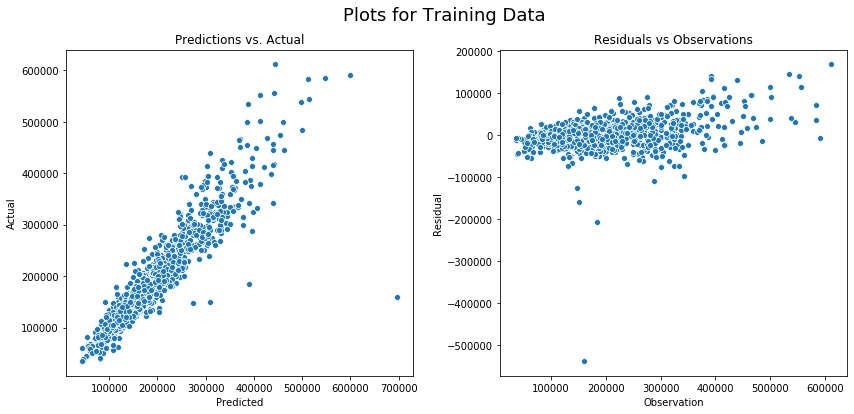

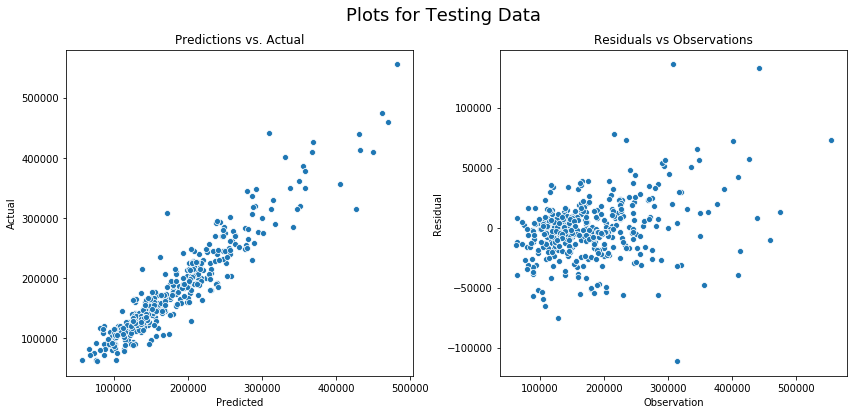

In [82]:
# now let's try house style:

lr, data_w_dum, df_kag = add_dummies_and_fit('House Style', data_ref)

The mean of residuals is:  2.168933869841576e-15
The Mean Absolute Error:  0.09621127406797308
The Sum Squared Error:  29.36255315983228
The Mean Squared Error:  0.017925856629934237
The Root Mean Squared Error:  0.13388747749485103
The Coefficient of Determination:  0.8907027474350371
The Adjusted Coefficient of Determination:  0.8846424226635433
The 5-fold cross validation score:  0.8608162392639789
The training score is:  0.8907027474350371
The testing score is:   0.8721806508565486
None


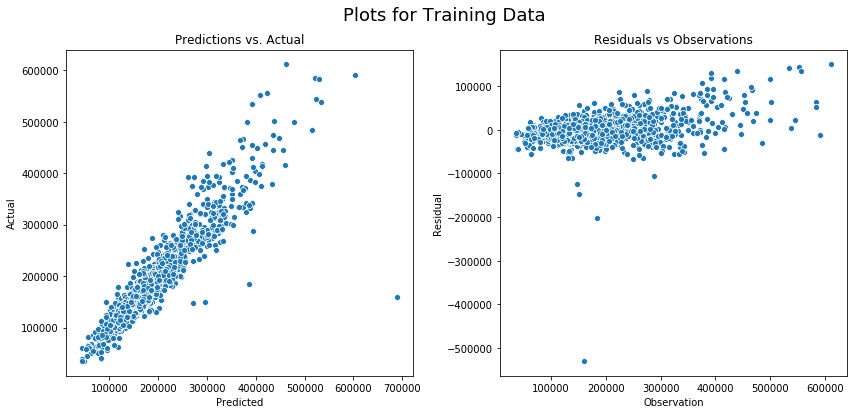

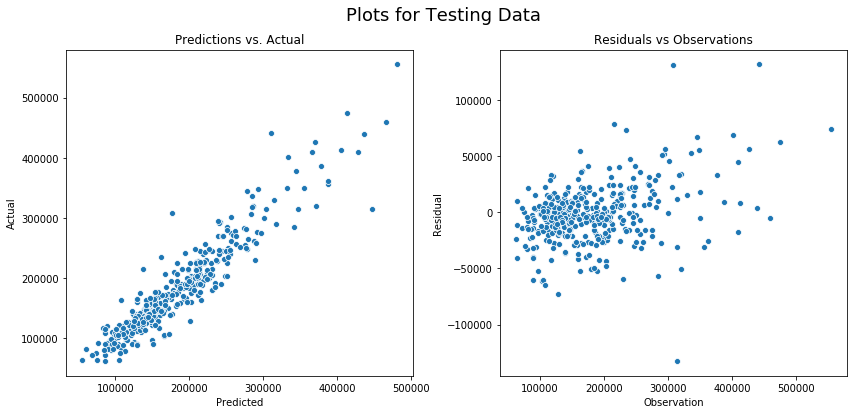

In [83]:
# incremental improvement for bias, but a slight dip in variance

# lets go ahead and drop it for now

# lets think about exterior quality:

lr, data_w_dum, df_kag = add_dummies_and_fit('Exter Qual', data_ref)

The mean of residuals is:  1.7264713603938942e-15
The Mean Absolute Error:  0.09507067342802365
The Sum Squared Error:  28.38439414648699
The Mean Squared Error:  0.017328689955120262
The Root Mean Squared Error:  0.1316384820450322
The Coefficient of Determination:  0.8943437827410727
The Adjusted Coefficient of Determination:  0.8869547531680628
The 5-fold cross validation score:  0.862183868835182
The training score is:  0.8943437827410727
The testing score is:   0.8695089976215471
None


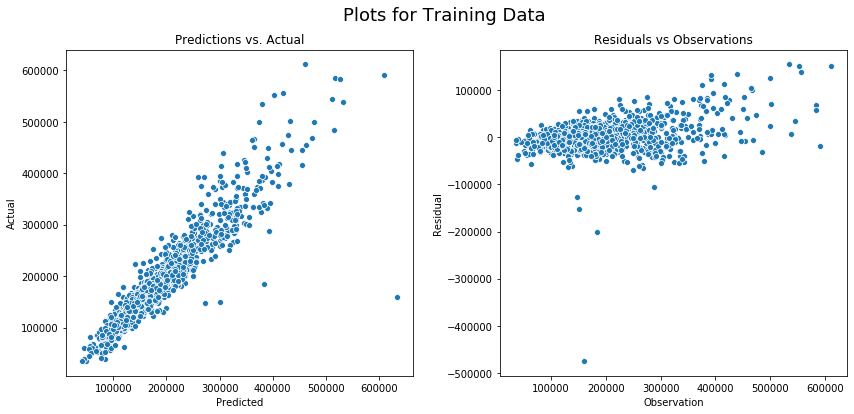

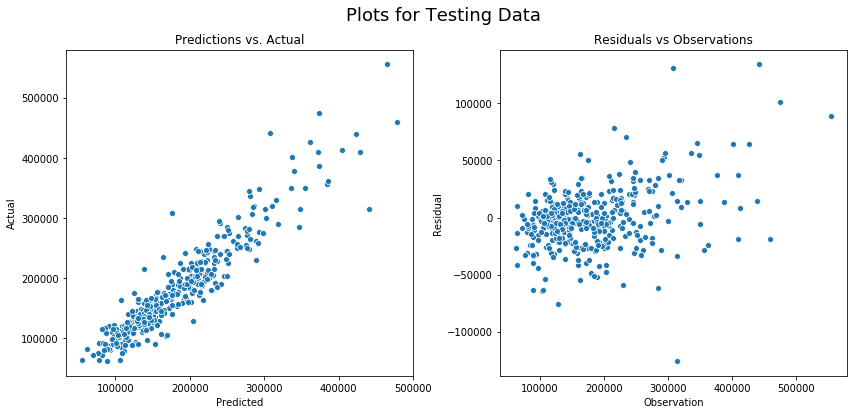

In [84]:
# definitely an improvement, let's keep it

data_ref = data_w_dum

# Lets try the ln of Year Built * Year Remod/Add 

data_all['condition'] = (data_all['Condition 1'] + data_all['Condition 2'])

lr, data_w_dum, df_kag = add_dummies_and_fit('condition', data_ref)

In [85]:
# another incremental improvement. We'll keep this one

data_ref = data_w_dum

The mean of residuals is:  1.94119581350821e-15
The Mean Absolute Error:  0.09183406616247679
The Sum Squared Error:  25.8028213158736
The Mean Squared Error:  0.015752638165979
The Root Mean Squared Error:  0.12550951424485318
The Coefficient of Determination:  0.9039532610499409
The Adjusted Coefficient of Determination:  0.8967639450681243
The 5-fold cross validation score:  0.8449392498695527
The training score is:  0.9039532610499409
The testing score is:   0.8726985962815519
None


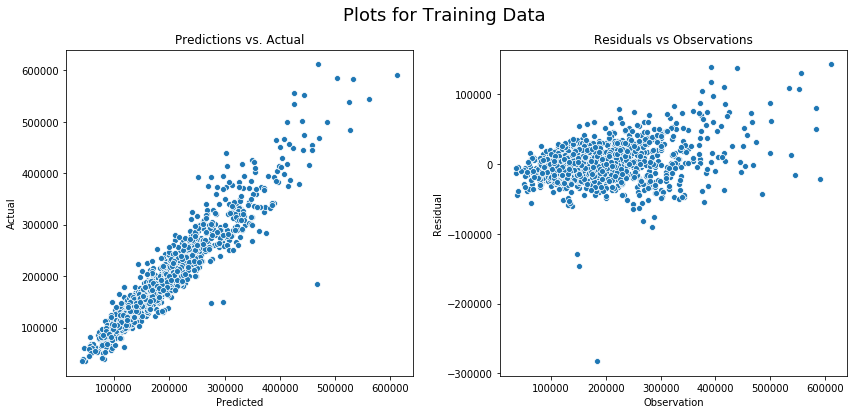

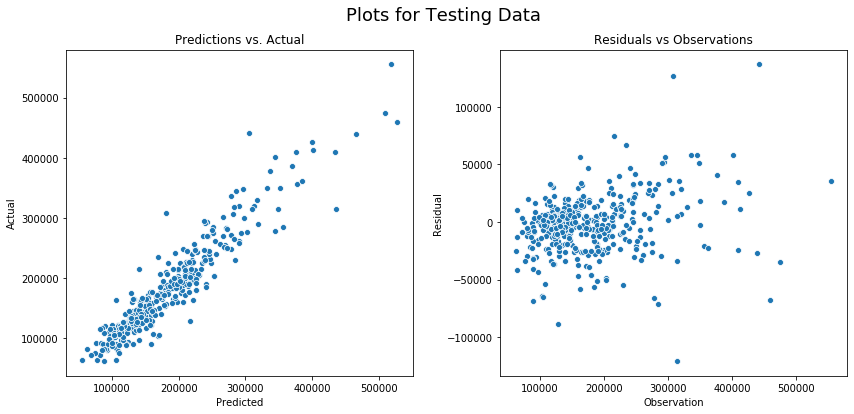

In [86]:
# lets try roof matl next:

lr, data_w_dum, df_kag = add_dummies_and_fit('Roof Matl', data_ref)

In [87]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.6961062862161123e-15
The Mean Absolute Error:  0.09052411757829863
The Sum Squared Error:  25.257830421000016
The Mean Squared Error:  0.015419920891941401
The Root Mean Squared Error:  0.12417697408111296
The Coefficient of Determination:  0.9059818996073021
The Adjusted Coefficient of Determination:  0.8986783210382842
The 5-fold cross validation score:  0.8480049991951212
The training score is:  0.9059818996073021
The testing score is:   0.8784917349257264
None


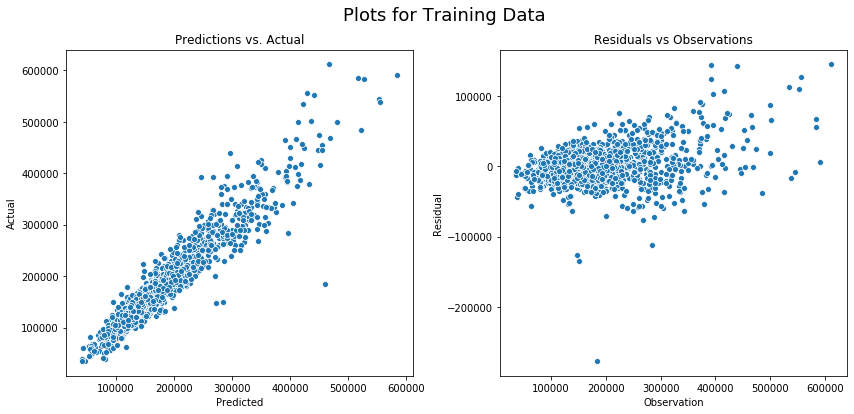

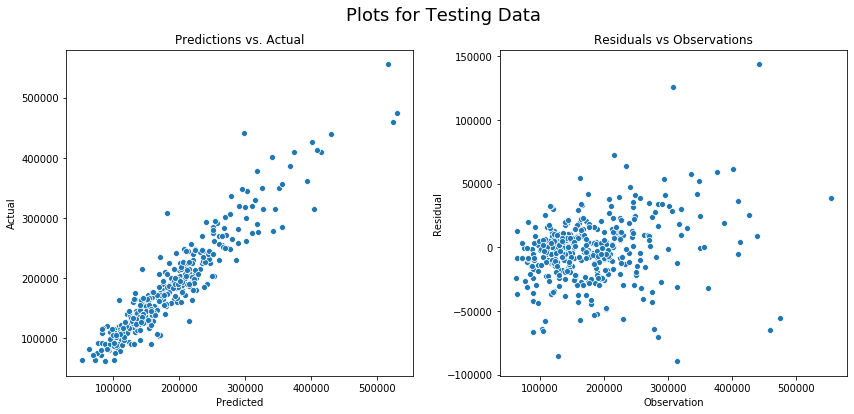

In [88]:
# lets go with Kitchen Qual next

lr, data_w_dum, df_kag = add_dummies_and_fit('Kitchen Qual', data_ref)

In [89]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.216771900981124e-15
The Mean Absolute Error:  0.0894200154231988
The Sum Squared Error:  24.712917557816514
The Mean Squared Error:  0.015087251256298237
The Root Mean Squared Error:  0.12283017241825495
The Coefficient of Determination:  0.9080102477045902
The Adjusted Coefficient of Determination:  0.9005368398232589
The 5-fold cross validation score:  0.8492565056103544
The training score is:  0.9080102477045902
The testing score is:   0.8805496397557141
None


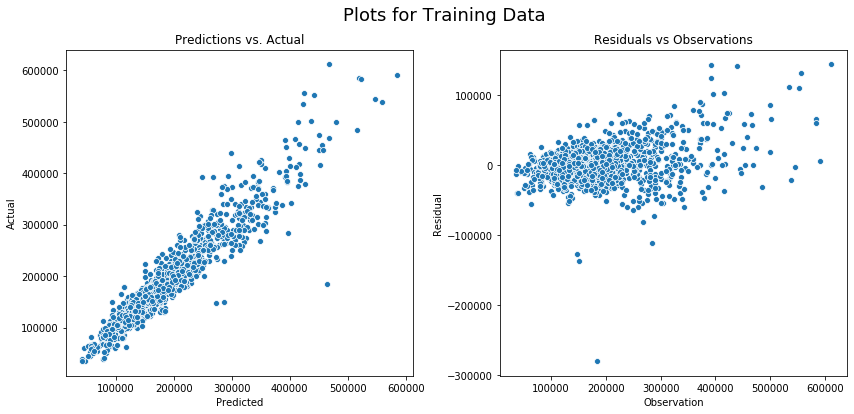

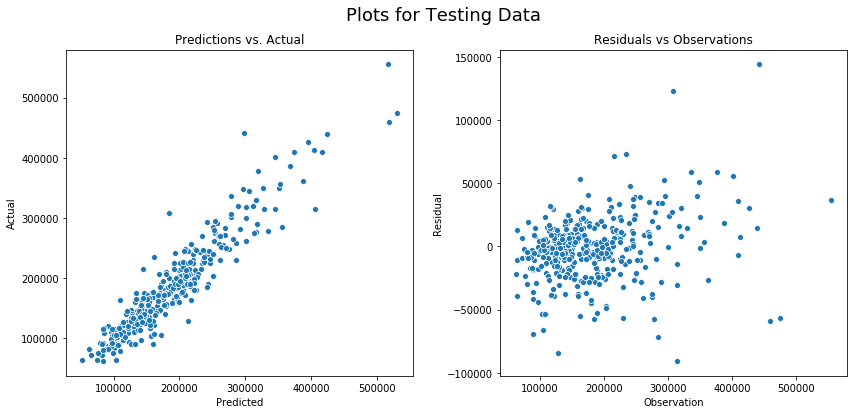

In [90]:
# Garage Type seems like a good bet

lr, data_w_dum, df_kag = add_dummies_and_fit('Garage Type', data_ref)

In [91]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  2.1472445311431598e-15
The Mean Absolute Error:  0.08692930754191282
The Sum Squared Error:  23.637239110939507
The Mean Squared Error:  0.014430548907777478
The Root Mean Squared Error:  0.12012721967887827
The Coefficient of Determination:  0.9120142829888186
The Adjusted Coefficient of Determination:  0.9045509484775984
The 5-fold cross validation score:  0.8577311788218352
The training score is:  0.9120142829888186
The testing score is:   0.8799794539713739
None


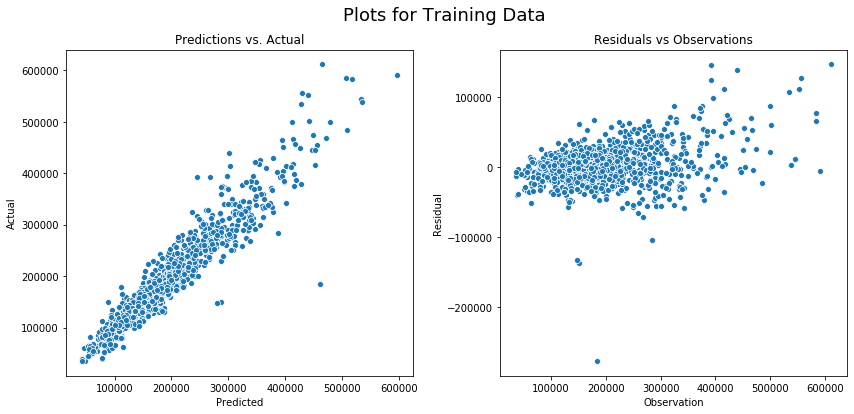

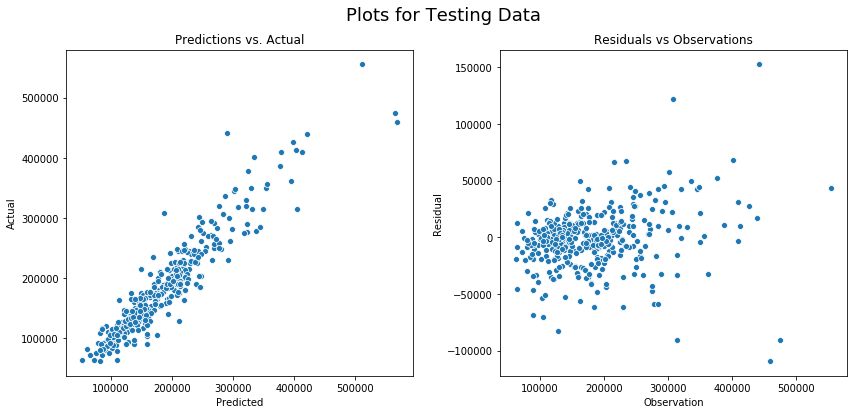

In [92]:
# Lets try garage cars

lr, data_w_dum, df_kag = add_dummies_and_fit('Garage Cars', data_ref)

In [93]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  2.075669713438388e-15
The Mean Absolute Error:  0.08640393296950943
The Sum Squared Error:  23.386940798564588
The Mean Squared Error:  0.014277741635265316
The Root Mean Squared Error:  0.1194895042891438
The Coefficient of Determination:  0.9129459770998624
The Adjusted Coefficient of Determination:  0.9054990480851954
The 5-fold cross validation score:  0.8579064757514041
The training score is:  0.9129459770998624
The testing score is:   0.8826441907168135
None


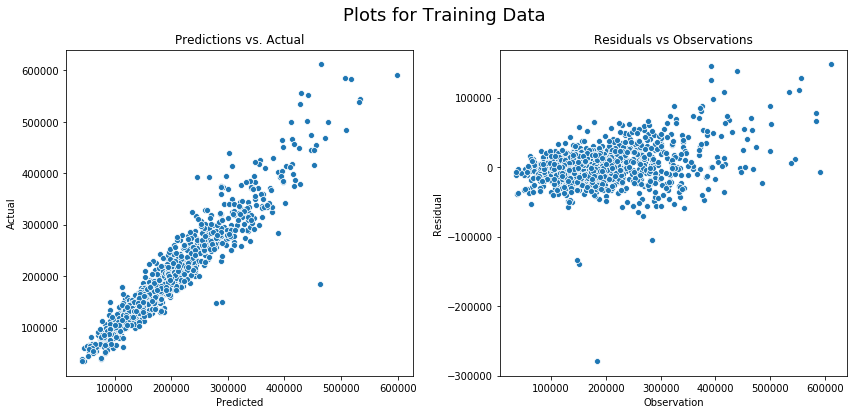

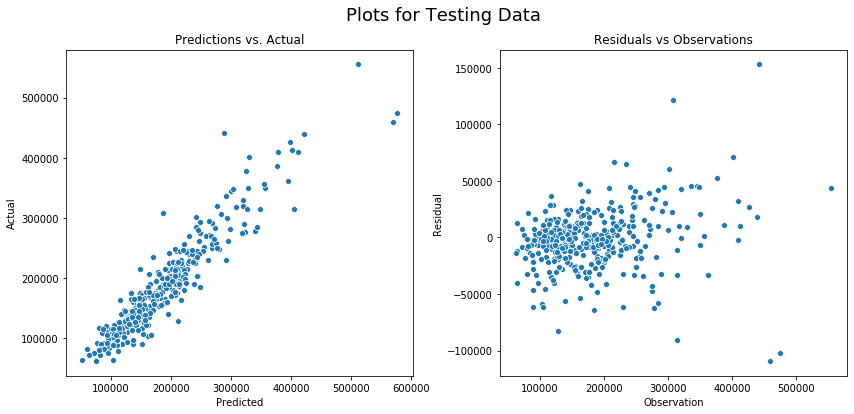

In [94]:
# Lets try ac

lr, data_w_dum, df_kag = add_dummies_and_fit('Central Air', data_ref)

In [95]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.9151686070701112e-15
The Mean Absolute Error:  0.08584809863509975
The Sum Squared Error:  23.106565291001488
The Mean Squared Error:  0.014106572216728624
The Root Mean Squared Error:  0.11877109167103174
The Coefficient of Determination:  0.9139896286003414
The Adjusted Coefficient of Determination:  0.9063836582571535
The 5-fold cross validation score:  0.8594577097581592
The training score is:  0.9139896286003414
The testing score is:   0.8862112622925511
None


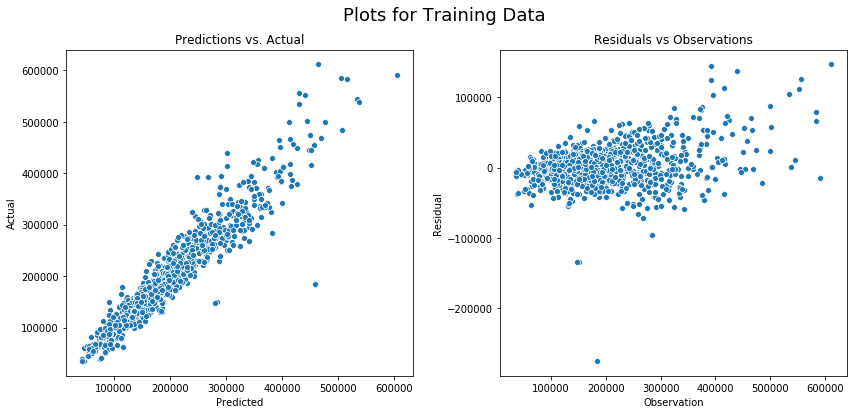

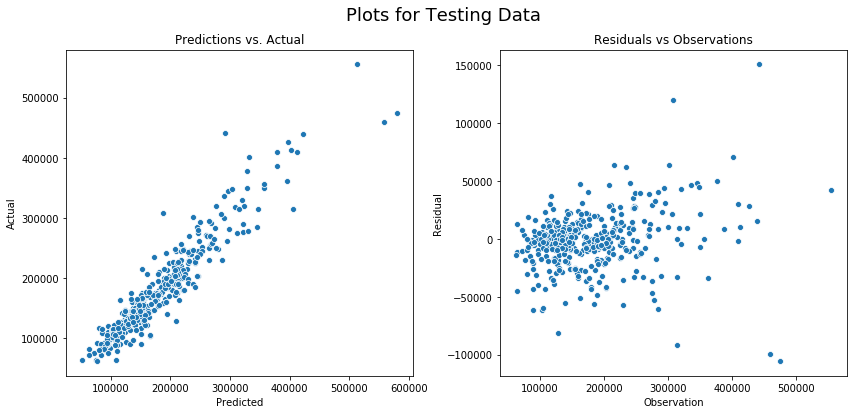

In [96]:
# Lets try heating QC

lr, data_w_dum, df_kag = add_dummies_and_fit('Heating QC', data_ref)

In [97]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  8.773337503509174e-16
The Mean Absolute Error:  0.0806846379509625
The Sum Squared Error:  20.65794054082631
The Mean Squared Error:  0.012611685311859773
The Root Mean Squared Error:  0.1123017600568209
The Coefficient of Determination:  0.92310422964678
The Adjusted Coefficient of Determination:  0.9148319512393632
The 5-fold cross validation score:  0.863962492415931
The training score is:  0.92310422964678
The testing score is:   0.897223099316304
None


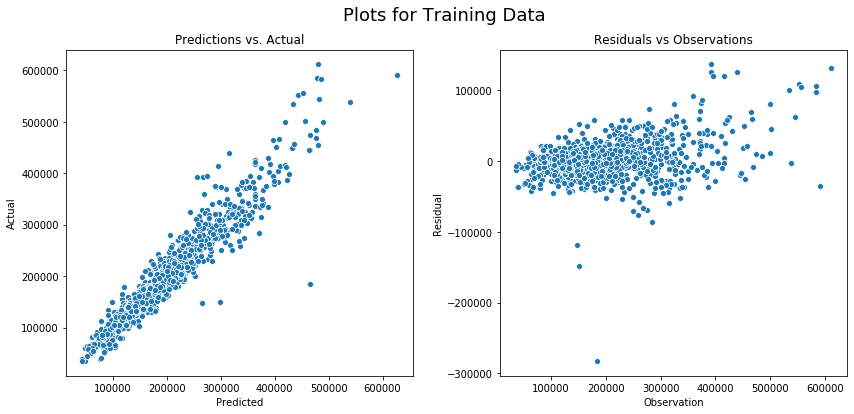

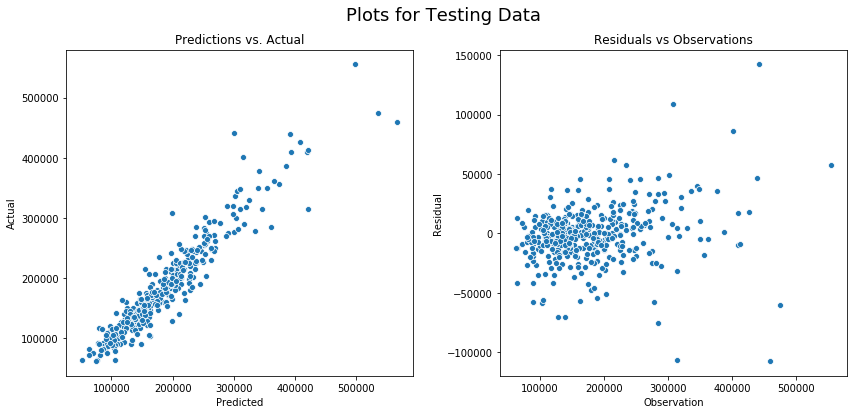

In [98]:
# Lets try basement type

data_all['basement_type'] = data_all['BsmtFin Type 1'] + data_all['BsmtFin Type 2']

lr, data_w_dum, df_kag = add_dummies_and_fit('basement_type', data_ref)

In [99]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.0660309970271344e-15
The Mean Absolute Error:  0.08064646513405686
The Sum Squared Error:  20.644022454373278
The Mean Squared Error:  0.012603188311583198
The Root Mean Squared Error:  0.11226392257347503
The Coefficient of Determination:  0.9231560374239169
The Adjusted Coefficient of Determination:  0.9147162259409845
The 5-fold cross validation score:  0.8636483819699718
The training score is:  0.9231560374239169
The testing score is:   0.8972685965431909
None


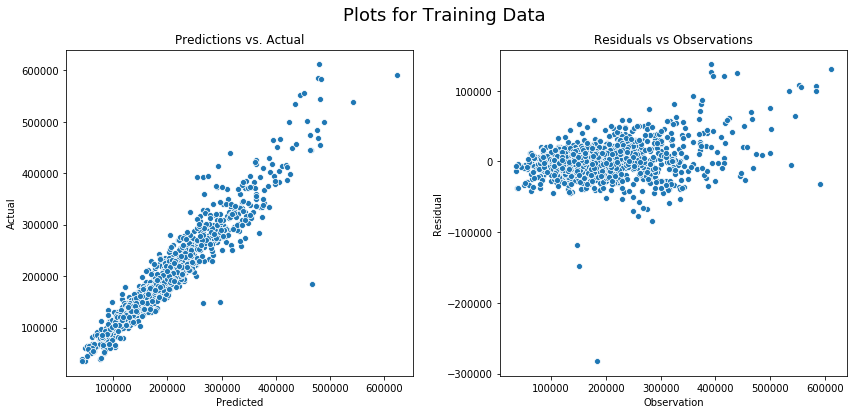

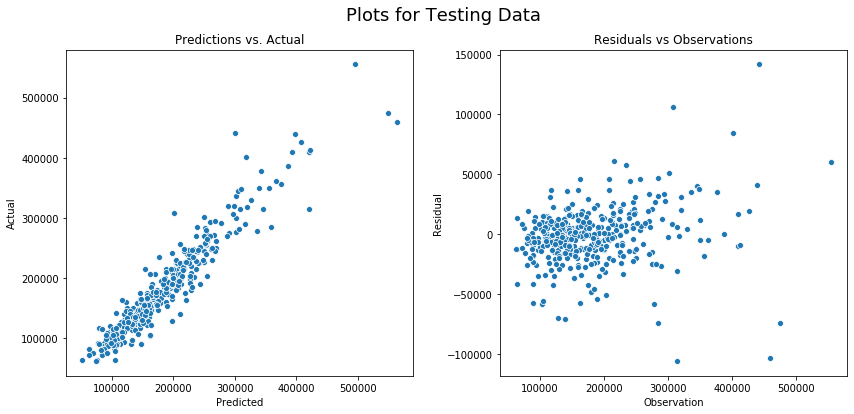

In [100]:
# how about lot shape:

lr, data_w_dum, df_kag = add_dummies_and_fit('Lot Shape', data_ref)

In [101]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.1864068268033418e-15
The Mean Absolute Error:  0.08064370935271029
The Sum Squared Error:  20.59002593427385
The Mean Squared Error:  0.012570223403097588
The Root Mean Squared Error:  0.11211700764423561
The Coefficient of Determination:  0.923357030548146
The Adjusted Coefficient of Determination:  0.9148238010911847
The 5-fold cross validation score:  0.8616734211153798
The training score is:  0.923357030548146
The testing score is:   0.8975435235133514
None


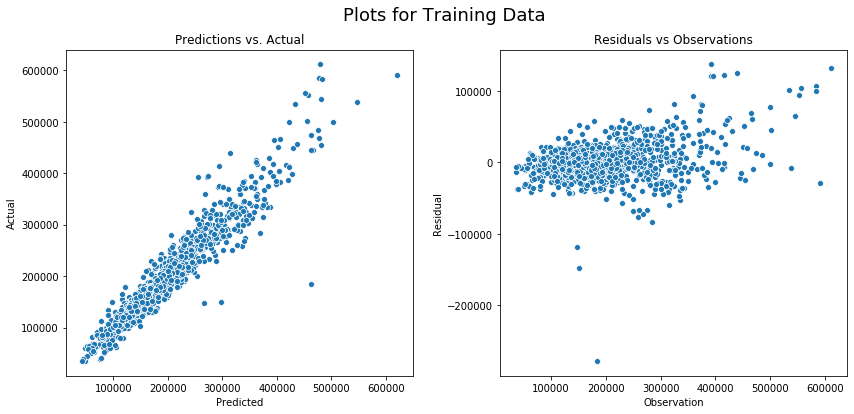

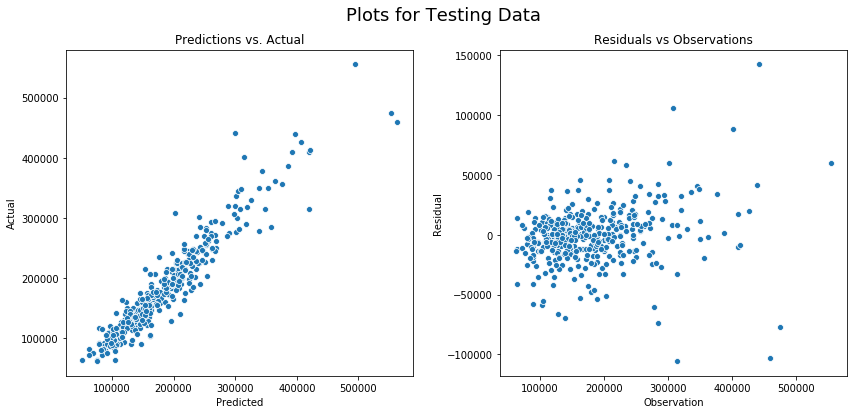

In [102]:
# lets try land slope

lr, data_w_dum, df_kag = add_dummies_and_fit('Land Slope', data_ref)

In [103]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.6906839515415081e-15
The Mean Absolute Error:  0.08061685359245742
The Sum Squared Error:  20.533914869509783
The Mean Squared Error:  0.012535967563803286
The Root Mean Squared Error:  0.11196413516748693
The Coefficient of Determination:  0.9235658947155031
The Adjusted Coefficient of Determination:  0.9148246219532189
The 5-fold cross validation score:  0.861391714551259
The training score is:  0.9235658947155031
The testing score is:   0.897590040908537
None


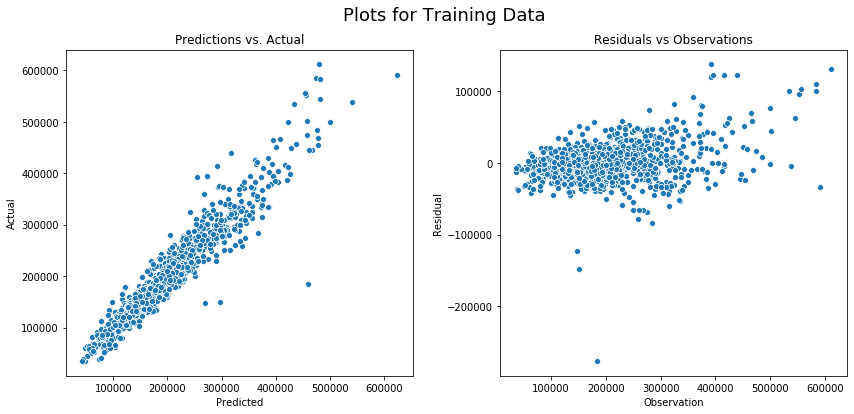

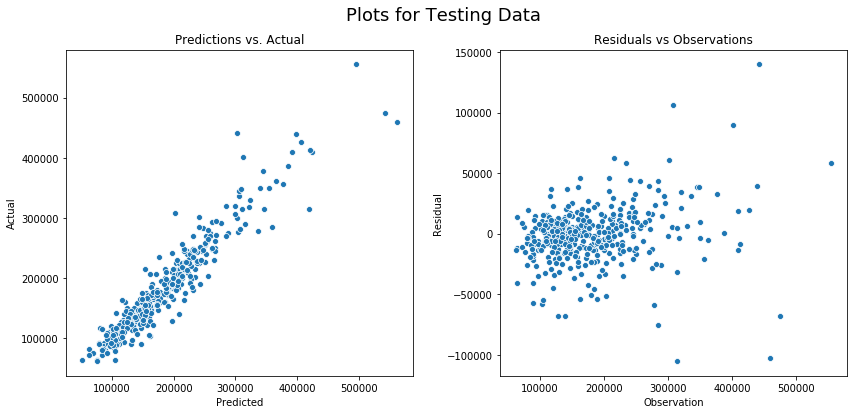

In [104]:
# lets try Bsmt Qual

lr, data_w_dum, df_kag = add_dummies_and_fit('Bsmt Qual', data_ref)

In [105]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  2.3890806576304958e-15
The Mean Absolute Error:  0.0801837519438502
The Sum Squared Error:  20.296291324496615
The Mean Squared Error:  0.012390898244503427
The Root Mean Squared Error:  0.11131441166580106
The Coefficient of Determination:  0.9244504090992937
The Adjusted Coefficient of Determination:  0.9155804230003711
The 5-fold cross validation score:  0.8598693433312015
The training score is:  0.9244504090992937
The testing score is:   0.9001520708139831
None


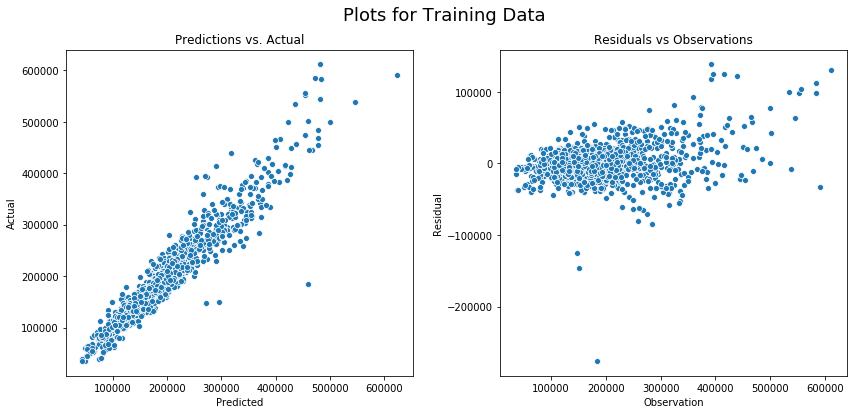

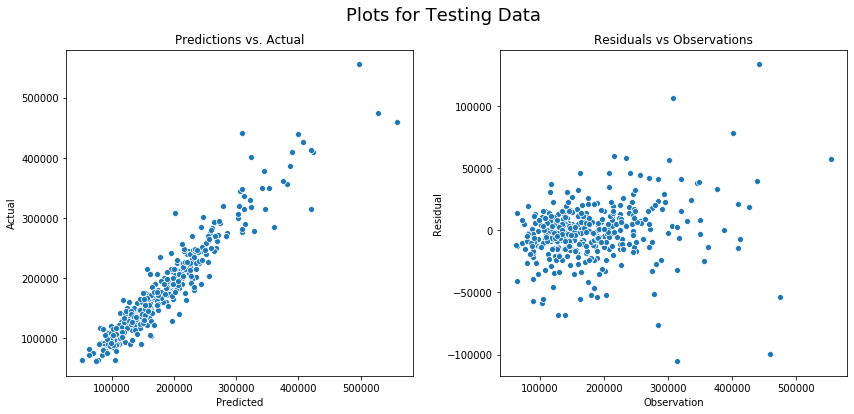

In [106]:
# lets try Bsmt Cond

lr, data_w_dum, df_kag = add_dummies_and_fit('Bsmt Cond', data_ref)

In [107]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.0877203357255503e-15
The Mean Absolute Error:  0.07906103375367264
The Sum Squared Error:  19.674648480058316
The Mean Squared Error:  0.01201138490846051
The Root Mean Squared Error:  0.10959646394140876
The Coefficient of Determination:  0.9267643718737135
The Adjusted Coefficient of Determination:  0.9179981373168735
The 5-fold cross validation score:  0.8636260026206705
The training score is:  0.9267643718737135
The testing score is:   0.9025389590270965
None


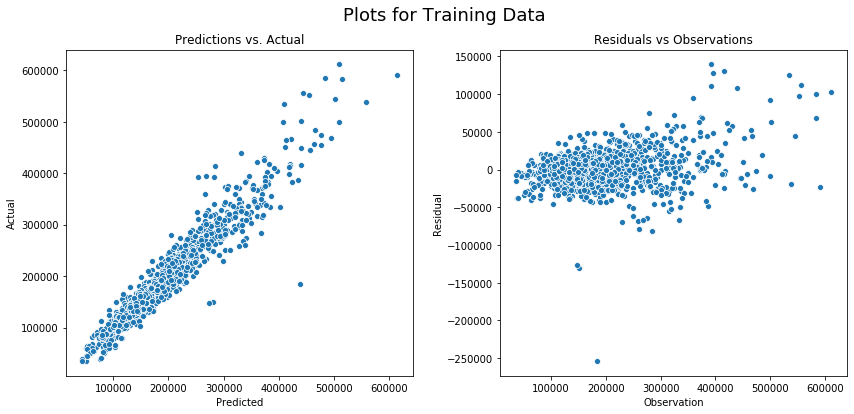

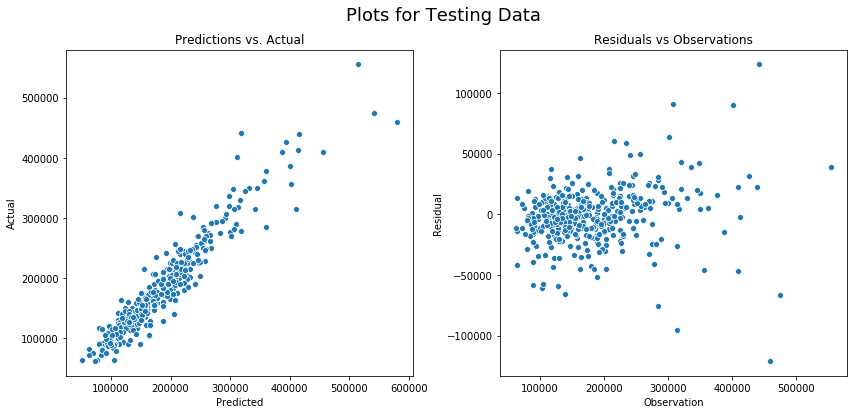

In [108]:
# lets try Bsmt Exposure

lr, data_w_dum, df_kag = add_dummies_and_fit('Bsmt Exposure', data_ref)

In [109]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  3.4377601836988975e-16
The Mean Absolute Error:  0.07882096153398489
The Sum Squared Error:  19.572696374358465
The Mean Squared Error:  0.011949143085688929
The Root Mean Squared Error:  0.10931213604028113
The Coefficient of Determination:  0.9271438717416421
The Adjusted Coefficient of Determination:  0.9181992579156846
The 5-fold cross validation score:  0.8639115059141682
The training score is:  0.9271438717416421
The testing score is:   0.9020672514654671
None


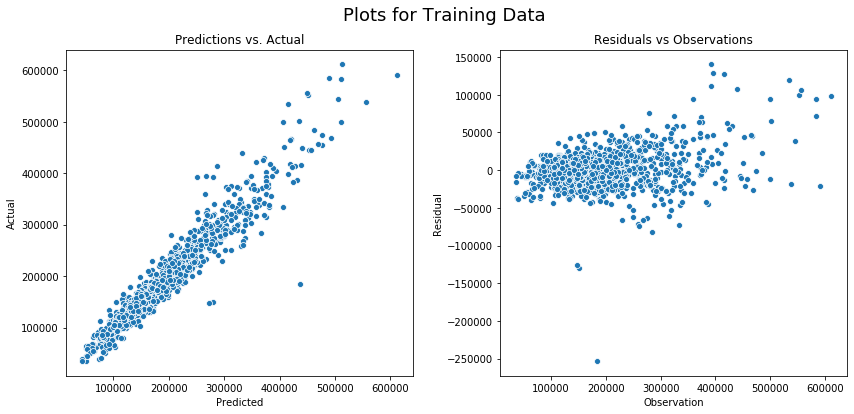

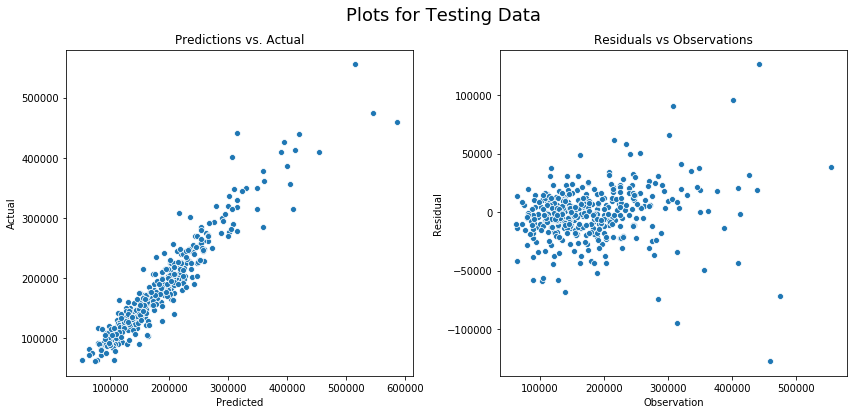

In [110]:
# lets try Yr Sold

lr, data_w_dum, df_kag = add_dummies_and_fit("Yr Sold", data_ref)

In [111]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.0768756663763422e-15
The Mean Absolute Error:  0.07877402276793881
The Sum Squared Error:  19.527247547272403
The Mean Squared Error:  0.011921396549006352
The Root Mean Squared Error:  0.10918514802392472
The Coefficient of Determination:  0.9273130474909637
The Adjusted Coefficient of Determination:  0.9182209338437852
The 5-fold cross validation score:  0.8634414849129424
The training score is:  0.9273130474909637
The testing score is:   0.9014904629717445
None


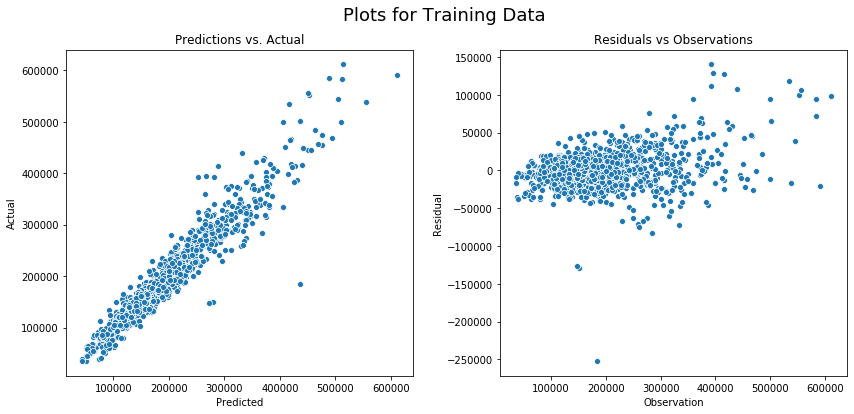

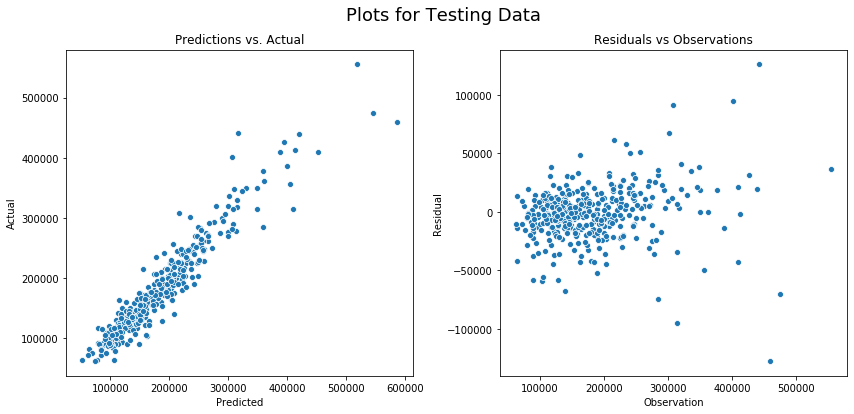

In [112]:
# lets try year remod/add

lr, data_w_dum, df_kag = add_dummies_and_fit("Fence", data_ref)

In [113]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  9.40232832576323e-16
The Mean Absolute Error:  0.07868551849603503
The Sum Squared Error:  19.465688343464045
The Mean Squared Error:  0.011883814617499417
The Root Mean Squared Error:  0.10901291032487583
The Coefficient of Determination:  0.9275421914557176
The Adjusted Coefficient of Determination:  0.9182540092439764
The 5-fold cross validation score:  0.8625181158137641
The training score is:  0.9275421914557176
The testing score is:   0.9010732356306527
None


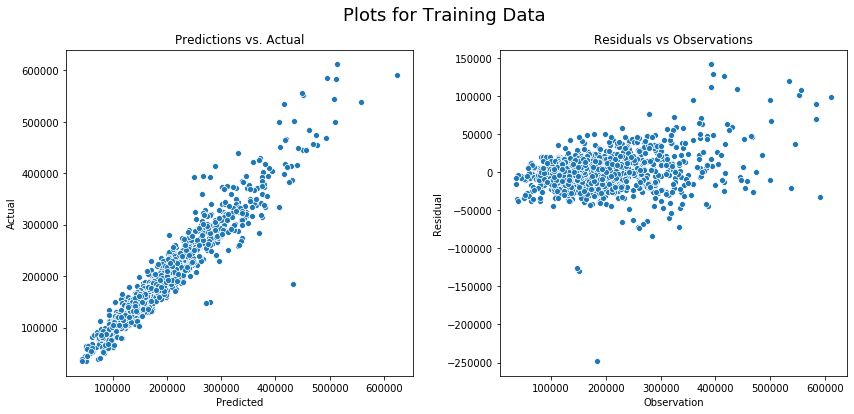

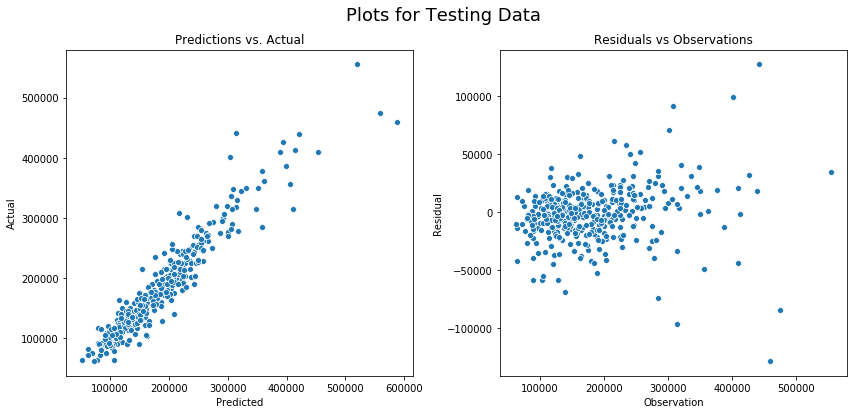

In [114]:
# lets try Misc Feature:

lr, data_w_dum, df_kag = add_dummies_and_fit("Misc Feature", data_ref)

In [115]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [116]:
# lets submit what we have and see what we get!

kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

This is submission number:  5


In [117]:
# now that we have come this far, lets do a ridge regression on the current features
# It may or may not be helpful, seeing as how so many of the variables are 
# One hot encodes. But it never hurts to try!

# first, lets get our X values set up:

df_ref = data_ref[:df_ref_rows]
df_kag = data_ref[df_ref_rows:]

In [118]:
# now we can train test split

X = df_ref
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)


In [119]:
# now we need to fit and transform our standard scaler

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [120]:
# now we can instantiate the model:

# we'll go with a big alpha space, cause I want to find a good score, and my computer
# can handle it =)
lasso_alphas = np.logspace(3.2, 3.25, 1_000)

lasso_final = LassoCV(alphas=lasso_alphas, cv=5, max_iter=5_000)

lasso_final.fit(Z_train, y_train)

LassoCV(alphas=array([1584.89319246, 1585.07585321, 1585.25853501, 1585.44123786,
       1585.62396177, 1585.80670674, 1585.98947277, 1586.17225987,
       1586.35506803, 1586.53789726, 1586.72074756, 1586.90361893,
       1587.08651139, 1587.26942492, 1587.45235953, 1587.63531522,
       1587.818292  , 1588.00128987, 1588.18430883, 1588.36734888,
       1588.55041003, 1588.73349227, 1588.91659562, 1589.099...
       1776.0265322 , 1776.23122128, 1776.43593395, 1776.64067022,
       1776.84543008, 1777.05021354, 1777.25502061, 1777.45985127,
       1777.66470555, 1777.86958343, 1778.07448493, 1778.27941004]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [121]:
lasso_final.score(Z_train, y_train)

0.917454697193145

In [122]:
lasso_final.score(Z_test, y_test)

0.8308013745368714

In [123]:
lasso_final.alpha_

1584.893192461114